In [1]:
import os
os.chdir("..")


In [2]:
%load_ext autoreload
%autoreload 2

from numerics.utilities.misc import *
import numpy as np
from scipy.stats import kstat
from tqdm import tqdm
import matplotlib.pyplot as plt
import pickle
from scipy.linalg import solve_continuous_are


In [3]:

gammas = np.linspace(110, 10000., 32)

total_time = 8.
dt = 1e-4
indgamma = 10

gamma = gammas[indgamma]
path = get_def_path()+"sweep_gamma/{}/".format(gamma)+"T_{}_dt_{}/".format(total_time,dt)


def load_gamma(gamma, itraj, what="logliks.npy", flip_params=0):
    h0 = gamma0, omega0, n0, eta0, kappa0 = 100., 0., 1., 1., 9
    h1 = gamma1, omega1, n1, eta1, kappa1 = gamma, 0., 1., 1., 9
    if flip_params ==1:
        params = [h0, h1]
    else:
        params = [h1,h0]
    exp_path = str(params)+"/"
    l =load_data(exp_path=exp_path, itraj=itraj, total_time=8., dt=1e-4, what=what)
    return l

In [4]:
def path_gamma(gamma, flip_params=0):
    h0 = gamma0, omega0, n0, eta0, kappa0 = 100., 0., 1., 1., 9
    h1 = gamma1, omega1, n1, eta1, kappa1 = gamma, 0., 1., 1., 9
    if flip_params ==1:
        params = [h0, h1]
    else:
        params = [h1,h0]
    exp_path = str(params)+"/"
    l =give_def_path(exp_path=exp_path, no_itraj=True, total_time=8., dt=1e-4)
    return l

In [5]:
from scipy.linalg import solve_continuous_are



In [6]:
gamma = gammas[np.argmin(np.abs(gammas-7447))]

In [7]:
d=[]
for gamma in gammas:
    path = get_def_path()+"sweep_gamma/{}/".format(gamma)+"T_{}_dt_{}/".format(total_time,dt)
    d.append(np.load(path+"momlik.npy"))
    

In [8]:
d = np.stack(d)

In [108]:
np.save("gamma_time_m0_m1_s0_s1.npy", d)

In [10]:
import numpy as np
import matplotlib.pyplot as plt 

def give_var(gamma, flip_params=0):

    
    h0 = gamma0, omega0, n0, eta0, kappa0 = 100., 0., 1., 1., 9
    h1 = gamma1, omega1, n1, eta1, kappa1 = gamma, 0., 1., 1., 9

    if flip_params ==1:
        params = [h0,h1]
    else:
        params = [h1, h0]

    [gamma1, omega1, n1, eta1, kappa1],[gamma0, omega0, n0, eta0, kappa0] = params

    def give_matrices(gamma, omega, n, eta, kappa):
        A = np.array([[-gamma/2, omega],[-omega, -gamma/2]])
        mm = np.eye(2)#homodyne but in Rotating Frame
        C = np.sqrt(4*eta*kappa)*mm#
        D = np.diag([gamma*(n+0.5) + kappa]*2)
        G = np.zeros((2,2))
        return A, C, D,G
    
    A1, C1, D1, G1 = give_matrices(gamma1, omega1, n1, eta1, kappa1)
    A0, C0, D0, G0 = give_matrices(gamma0, omega0, n0, eta0, kappa0)

    proj_C = np.linalg.pinv(C1/C1[0,0])

    sst1 = solve_continuous_are( (A1-np.dot(G1.T,C1)).T, C1.T, D1 - np.dot(G1.T, G1), np.eye(2)) #### A.T because the way it's implemented!
    sst0 = solve_continuous_are( (A0-np.dot(G0.T,C0)).T, C0.T, D0 - np.dot(G0.T, G0), np.eye(2)) #### A.T because the way it's implemented!
    
    sigma0 = sst0[0,0]
    sigma1 = sst1[1,1]
    eta = eta1
    kappa = kappa1
    n = n1
#    var1 = (32*(-2*eta**2*gamma0**2*gamma1**2*kappa**2*sigma0**2 + eta**2*gamma0**3*gamma1**2*kappa**2*sigma0**2 - 4*eta**2*gamma0*gamma1**3*kappa**2*sigma0**2 + 2*eta**2*gamma0**2*gamma1**3*kappa**2*sigma0**2 - 2*eta**2*gamma1**4*kappa**2*sigma0**2 + eta**2*gamma0*gamma1**4*kappa**2*sigma0**2 + 8*eta**3*gamma0**2*gamma1**2*kappa**3*sigma0**3 + 16*eta**3*gamma0*gamma1**3*kappa**3*sigma0**3 + 8*eta**3*gamma1**4*kappa**3*sigma0**3 + 4*eta**2*gamma0**3*gamma1*kappa**2*sigma0*sigma1 - 4*eta**2*gamma0**3*gamma1**2*kappa**2*sigma0*sigma1 - 4*eta**2*gamma0*gamma1**3*kappa**2*sigma0*sigma1 - 4*eta**2*gamma0**2*gamma1**3*kappa**2*sigma0*sigma1 + 16*eta**3*gamma0**3*gamma1*kappa**3*sigma0**2*sigma1 - 64*eta**3*gamma0*gamma1**2*kappa**3*sigma0**2*sigma1 - 32*eta**3*gamma0**2*gamma1**2*kappa**3*sigma0**2*sigma1 - 64*eta**3*gamma1**3*kappa**3*sigma0**2*sigma1 - 16*eta**3*gamma0*gamma1**3*kappa**3*sigma0**2*sigma1 + 128*eta**4*gamma0**2*gamma1*kappa**4*sigma0**3*sigma1 + 64*eta**4*gamma0*gamma1**2*kappa**4*sigma0**3*sigma1 + 64*eta**4*gamma1**3*kappa**4*sigma0**3*sigma1 + 2*eta**2*gamma0**4*kappa**2*sigma1**2 + 4*eta**2*gamma0**3*gamma1*kappa**2*sigma1**2 + eta**2*gamma0**4*gamma1*kappa**2*sigma1**2 + 2*eta**2*gamma0**2*gamma1**2*kappa**2*sigma1**2 + 2*eta**2*gamma0**3*gamma1**2*kappa**2*sigma1**2 + eta**2*gamma0**2*gamma1**3*kappa**2*sigma1**2 + 64*eta**3*gamma0**3*kappa**3*sigma0*sigma1**2 + 64*eta**3*gamma0**2*gamma1*kappa**3*sigma0*sigma1**2 - 16*eta**3*gamma0**3*gamma1*kappa**3*sigma0*sigma1**2 - 64*eta**3*gamma0*gamma1**2*kappa**3*sigma0*sigma1**2 - 16*eta**3*gamma0**2*gamma1**2*kappa**3*sigma0*sigma1**2 + 256*eta**4*gamma0**2*kappa**4*sigma0**2*sigma1**2 + 64*eta**4*gamma0**3*kappa**4*sigma0**2*sigma1**2 - 320*eta**4*gamma0**2*gamma1*kappa**4*sigma0**2*sigma1**2 - 640*eta**4*gamma1**2*kappa**4*sigma0**2*sigma1**2 - 192*eta**4*gamma0*gamma1**2*kappa**4*sigma0**2*sigma1**2 + 512*eta**5*gamma0**2*kappa**5*sigma0**3*sigma1**2 + 32*eta**3*gamma0**3*kappa**3*sigma1**3 + 32*eta**3*gamma0**2*gamma1*kappa**3*sigma1**3 + 16*eta**3*gamma0**3*gamma1*kappa**3*sigma1**3 + 16*eta**3*gamma0**2*gamma1**2*kappa**3*sigma1**3 + 512*eta**4*gamma0**2*kappa**4*sigma0*sigma1**3 - 64*eta**4*gamma0**3*kappa**4*sigma0*sigma1**3 - 256*eta**4*gamma0*gamma1*kappa**4*sigma0*sigma1**3 + 192*eta**4*gamma0**2*gamma1*kappa**4*sigma0*sigma1**3 + 2048*eta**5*gamma0*kappa**5*sigma0**2*sigma1**3 - 1024*eta**5*gamma0**2*kappa**5*sigma0**2*sigma1**3 - 2048*eta**5*gamma1*kappa**5*sigma0**2*sigma1**3 + 128*eta**4*gamma0**2*kappa**4*sigma1**4 + 64*eta**4*gamma0**2*gamma1*kappa**4*sigma1**4 + 512*eta**5*gamma0**2*kappa**5*sigma0*sigma1**4))/(gamma0**2*(gamma1 + 8*eta*kappa*sigma1)**2*(gamma0 + gamma1 + 8*eta*kappa*sigma1)**2)
    var1 = (32*(eta**2*gamma0**5*gamma1**3*kappa**2*sigma0**2 + 3*eta**2*gamma0**4*gamma1**4*kappa**2*sigma0**2 + 3*eta**2*gamma0**3*gamma1**5*kappa**2*sigma0**2 + eta**2*gamma0**2*gamma1**6*kappa**2*sigma0**2 + 8*eta**3*gamma0**4*gamma1**3*kappa**3*sigma0**3 + 24*eta**3*gamma0**3*gamma1**4*kappa**3*sigma0**3 + 24*eta**3*gamma0**2*gamma1**5*kappa**3*sigma0**3 + 8*eta**3*gamma0*gamma1**6*kappa**3*sigma0**3 + 16*eta**4*gamma0**3*gamma1**3*kappa**4*sigma0**4 + 48*eta**4*gamma0**2*gamma1**4*kappa**4*sigma0**4 + 48*eta**4*gamma0*gamma1**5*kappa**4*sigma0**4 + 16*eta**4*gamma1**6*kappa**4*sigma0**4 - 4*eta**2*gamma0**5*gamma1**3*kappa**2*sigma0*sigma1 - 8*eta**2*gamma0**4*gamma1**4*kappa**2*sigma0*sigma1 - 4*eta**2*gamma0**3*gamma1**5*kappa**2*sigma0*sigma1 + 24*eta**3*gamma0**5*gamma1**2*kappa**3*sigma0**2*sigma1 + 16*eta**3*gamma0**4*gamma1**3*kappa**3*sigma0**2*sigma1 - 8*eta**3*gamma0**3*gamma1**4*kappa**3*sigma0**2*sigma1 + 192*eta**4*gamma0**4*gamma1**2*kappa**4*sigma0**3*sigma1 + 256*eta**4*gamma0**3*gamma1**3*kappa**4*sigma0**3*sigma1 + 192*eta**4*gamma0**2*gamma1**4*kappa**4*sigma0**3*sigma1 + 128*eta**4*gamma0*gamma1**5*kappa**4*sigma0**3*sigma1 + 384*eta**5*gamma0**3*gamma1**2*kappa**5*sigma0**4*sigma1 + 512*eta**5*gamma0**2*gamma1**3*kappa**5*sigma0**4*sigma1 + 384*eta**5*gamma0*gamma1**4*kappa**5*sigma0**4*sigma1 + 256*eta**5*gamma1**5*kappa**5*sigma0**4*sigma1 + eta**2*gamma0**6*gamma1**2*kappa**2*sigma1**2 + 3*eta**2*gamma0**5*gamma1**3*kappa**2*sigma1**2 + 3*eta**2*gamma0**4*gamma1**4*kappa**2*sigma1**2 + eta**2*gamma0**3*gamma1**5*kappa**2*sigma1**2 - 48*eta**3*gamma0**5*gamma1**2*kappa**3*sigma0*sigma1**2 - 128*eta**3*gamma0**4*gamma1**3*kappa**3*sigma0*sigma1**2 - 80*eta**3*gamma0**3*gamma1**4*kappa**3*sigma0*sigma1**2 + 192*eta**4*gamma0**5*gamma1*kappa**4*sigma0**2*sigma1**2 - 64*eta**4*gamma0**4*gamma1**2*kappa**4*sigma0**2*sigma1**2 - 512*eta**4*gamma0**3*gamma1**3*kappa**4*sigma0**2*sigma1**2 - 256*eta**4*gamma0**2*gamma1**4*kappa**4*sigma0**2*sigma1**2 + 1536*eta**5*gamma0**4*gamma1*kappa**5*sigma0**3*sigma1**2 + 1024*eta**5*gamma0**3*gamma1**2*kappa**5*sigma0**3*sigma1**2 + 512*eta**5*gamma0*gamma1**4*kappa**5*sigma0**3*sigma1**2 + 3072*eta**6*gamma0**3*gamma1*kappa**6*sigma0**4*sigma1**2 + 2048*eta**6*gamma0**2*gamma1**2*kappa**6*sigma0**4*sigma1**2 + 1024*eta**6*gamma1**4*kappa**6*sigma0**4*sigma1**2 + 8*eta**3*gamma0**6*gamma1*kappa**3*sigma1**3 + 48*eta**3*gamma0**5*gamma1**2*kappa**3*sigma1**3 + 72*eta**3*gamma0**4*gamma1**3*kappa**3*sigma1**3 + 32*eta**3*gamma0**3*gamma1**4*kappa**3*sigma1**3 - 256*eta**4*gamma0**5*gamma1*kappa**4*sigma0*sigma1**3 - 768*eta**4*gamma0**4*gamma1**2*kappa**4*sigma0*sigma1**3 - 512*eta**4*gamma0**3*gamma1**3*kappa**4*sigma0*sigma1**3 + 512*eta**5*gamma0**5*kappa**5*sigma0**2*sigma1**3 - 1024*eta**5*gamma0**4*gamma1*kappa**5*sigma0**2*sigma1**3 - 3072*eta**5*gamma0**3*gamma1**2*kappa**5*sigma0**2*sigma1**3 - 2048*eta**5*gamma0**2*gamma1**3*kappa**5*sigma0**2*sigma1**3 + 4096*eta**6*gamma0**4*kappa**6*sigma0**3*sigma1**3 + 8192*eta**7*gamma0**3*kappa**7*sigma0**4*sigma1**3 + 16*eta**4*gamma0**6*kappa**4*sigma1**4 + 240*eta**4*gamma0**5*gamma1*kappa**4*sigma1**4 + 624*eta**4*gamma0**4*gamma1**2*kappa**4*sigma1**4 + 400*eta**4*gamma0**3*gamma1**3*kappa**4*sigma1**4 - 512*eta**5*gamma0**5*kappa**5*sigma0*sigma1**4 - 2560*eta**5*gamma0**4*gamma1*kappa**5*sigma0*sigma1**4 - 1024*eta**5*gamma0**3*gamma1**2*kappa**5*sigma0*sigma1**4 - 2048*eta**6*gamma0**4*kappa**6*sigma0**2*sigma1**4 - 10240*eta**6*gamma0**3*gamma1*kappa**6*sigma0**2*sigma1**4 - 4096*eta**6*gamma0**2*gamma1**2*kappa**6*sigma0**2*sigma1**4 + 384*eta**5*gamma0**5*kappa**5*sigma1**5 + 2304*eta**5*gamma0**4*gamma1*kappa**5*sigma1**5 + 2432*eta**5*gamma0**3*gamma1**2*kappa**5*sigma1**5 - 4096*eta**6*gamma0**4*kappa**6*sigma0*sigma1**5 - 16384*eta**7*gamma0**3*kappa**7*sigma0**2*sigma1**5 + 3072*eta**6*gamma0**4*kappa**6*sigma1**6 + 7168*eta**6*gamma0**3*gamma1*kappa**6*sigma1**6 + 8192*eta**7*gamma0**3*kappa**7*sigma1**7))/(gamma0**3*(gamma1 + 8*eta*kappa*sigma1)**3*(gamma0 + gamma1 + 8*eta*kappa*sigma1)**3)
    return var1


def give_mu(gamma, flip_params=0):

    
    h0 = gamma0, omega0, n0, eta0, kappa0 = 100., 0., 1., 1., 9
    h1 = gamma1, omega1, n1, eta1, kappa1 = gamma, 0., 1., 1., 9

    if flip_params ==1:
        params = [h0,h1]
    else:
        params = [h1, h0]

    [gamma1, omega1, n1, eta1, kappa1],[gamma0, omega0, n0, eta0, kappa0] = params

    Su1 = n1 + 0.5 + (kappa1 / gamma1)
    Su0 = n0 + 0.5 + (kappa0 / gamma0)

    S1 = (np.sqrt(1 + (16.0*eta1*kappa1*Su1/gamma1)) - 1)*(gamma1/(8.0*eta1*kappa1))
    S0 = (np.sqrt(1 + (16.0*eta0*kappa0*Su0/gamma0)) - 1)*( gamma0/(8.0*eta0*kappa0))

    lam = gamma0 + (8*eta0*kappa0*S0)

    aa = (4*eta1*kappa1*(S1**2))/gamma1
    bb =(4*eta0*kappa0*S0**2)*(1+((16.0*eta1*kappa1*S1)/ (gamma1 + lam)) + (64.0*(eta1 * kappa1 * S1)**(2)/(gamma1 * (gamma1 + lam))))/ lam
    c =8 *(S0*S1*(eta0*kappa0 *eta1*kappa1)**(0.5)) * (gamma1+ (4.0*eta1*kappa1*S1) ) / ((gamma1 + lam)*gamma1)

    mu = 4*(eta1*kappa1*aa + (eta0*kappa0*bb) - 2*np.sqrt(eta1*kappa1*eta0*kappa0)*c)
    return mu




In [12]:
gammast = np.linspace(110., 10000, 32)[:-1] #---> all batch, before 6/11
gammast_ = np.linspace(gammast[0] + 10, gammast[1]-10, 32) #---> all batch, before 6/11

mu1 = np.array([give_mu(gamma) for gamma in gammast_])
mu0 = np.array([give_mu(gamma,flip_params=True) for gamma in gammast_])

Text(0.5, 0, 'gamma')

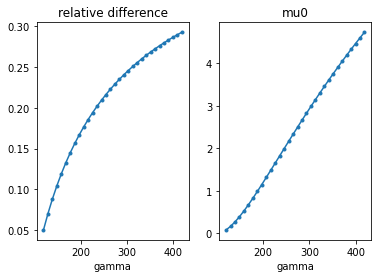

In [16]:
plt.subplot(121)
plt.title("relative difference")
plt.plot(gammast_, (mu0-mu1)/mu0,'.-')
plt.xlabel("gamma")
plt.subplot(122)
plt.title("mu0")
plt.plot(gammast_, mu0,'.-')
plt.xlabel("gamma")

In [ ]:


d = np.load("gamma_time_m0_m1_s0_s1.npy")
gammas = np.linspace(110, 10000., 32)
indgamma = 2
gamma = gammas[2]
tims, m1, m0, s1, s0 = d[indgamma]



plt.figure(figsize=(10,5))
ax=plt.subplot(121)
ax.set_title("mean/t")
ax.plot(tims, m1/tims,  label=r'$\mu_1$'+"numerics")
ax.plot(tims, np.ones(len(tims))*give_mu(gamma,flip_params=1),'--',label=r'$\mu_1$'+"mathametica", color="black")
ax.plot(tims, m0/tims, label=r'$\mu_0$'+"numerics")
ax.plot(tims, -np.ones(len(tims))*give_mu(gamma,flip_params=0),'--',label=r'$\mu_0$'+"mathametica", color="black")
ax.legend(prop={"size":10})
ax=plt.subplot(122)
ax.set_title("variance/t")
ax.plot(tims, s0**2/tims, label=r'$\sigma_0$'+"numerics")
ax.plot(tims, s1**2/tims,label=r'$\sigma_1$'+"numerics")
ax.plot(tims, np.ones(len(tims))*give_var(gamma, flip_params=1),'--',label=r'$\sigma_1$'+"mathametica", color="red")
ax.plot(tims, np.ones(len(tims))*give_var(gamma, flip_params=0) ,'--',label=r'$\sigma_0$'+"mathametica", color="blue")
ax.legend(prop={"size":10})

/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


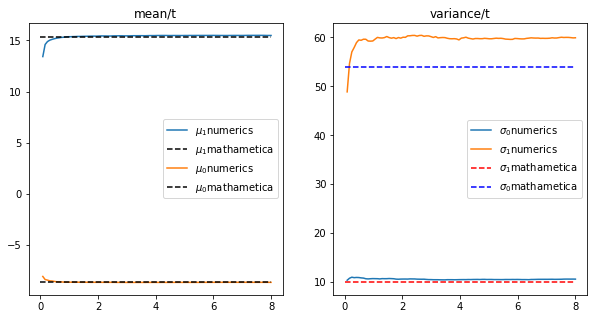

In [104]:
path = get_def_path()+"sweep_gamma/{}/".format(gamma)+"T_{}_dt_{}/".format(total_time,dt)
tims, m1, m0, s1, s0 = np.load(path+"momlik.npy")

plt.figure(figsize=(10,5))
ax=plt.subplot(121)
ax.set_title("mean/t")
ax.plot(tims, m0/tims,  label=r'$\mu_1$'+"numerics")
ax.plot(tims, np.ones(len(tims))*give_mu(gamma,flip_params=1),'--',label=r'$\mu_1$'+"mathametica", color="black")
ax.plot(tims, m1/tims, label=r'$\mu_0$'+"numerics")
ax.plot(tims, -np.ones(len(tims))*give_mu(gamma,flip_params=0),'--',label=r'$\mu_0$'+"mathametica", color="black")
ax.legend(prop={"size":10})
ax=plt.subplot(122)
ax.set_title("variance/t")
ax.plot(tims, s1**2/tims, label=r'$\sigma_0$'+"numerics")
ax.plot(tims, s0**2/tims,label=r'$\sigma_1$'+"numerics")
ax.plot(tims, np.ones(len(tims))*give_var(gamma, flip_params=1),'--',label=r'$\sigma_1$'+"mathametica", color="red")
ax.plot(tims, np.ones(len(tims))*give_var(gamma, flip_params=0) ,'--',label=r'$\sigma_0$'+"mathametica", color="blue")
ax.legend(prop={"size":10})

/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


110.0


/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


429.03225806451616


/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


748.0645161290323


/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


1067.0967741935485


/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


1386.1290322580646


/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


1705.1612903225807


/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


2024.193548387097


/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


2343.225806451613


/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


2662.2580645161293


/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


2981.2903225806454


/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


3300.3225806451615


/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


3619.3548387096776


/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


3938.387096774194


/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


4257.41935483871


/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


4576.451612903226


/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


4895.483870967742


/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


5214.5161290322585


/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


5533.548387096775


/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


5852.580645161291


/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


6171.612903225807


/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel

6490.645161290323


/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


6809.677419354839


/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


7128.709677419355


/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


7447.741935483871


/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


7766.774193548388


/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


8085.806451612904


/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


8404.83870967742


/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


8723.870967741936


/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


9042.903225806453


/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


9361.935483870968


/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


9680.967741935485


/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


10000.0


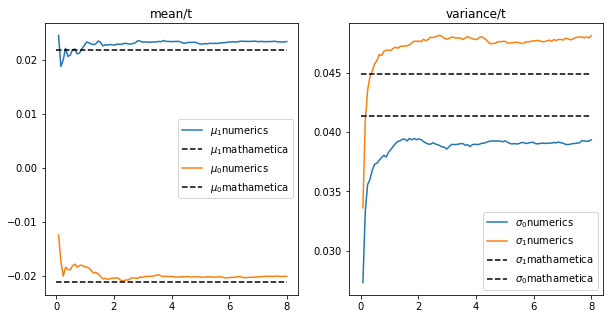

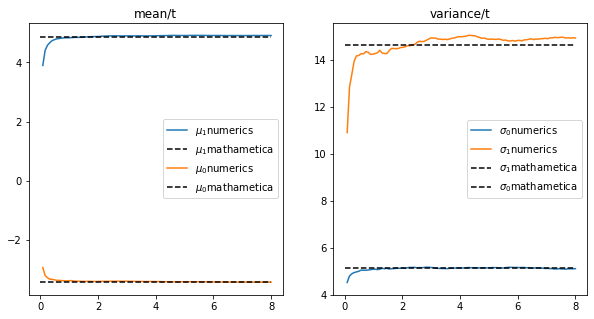

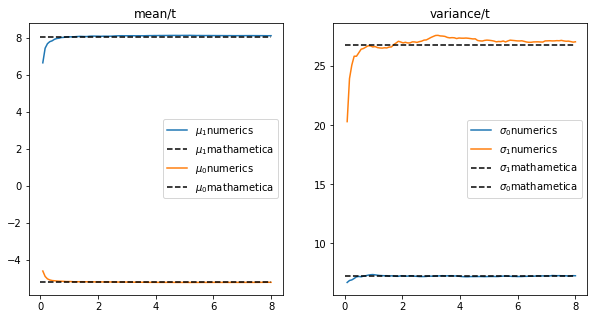

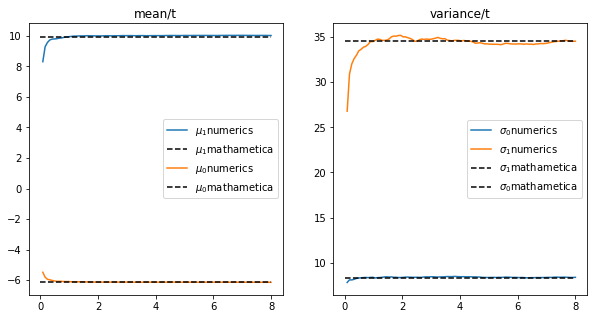

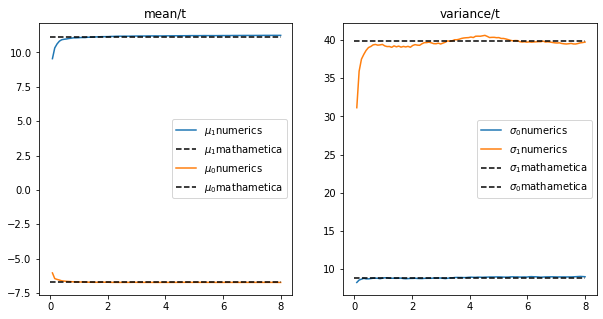

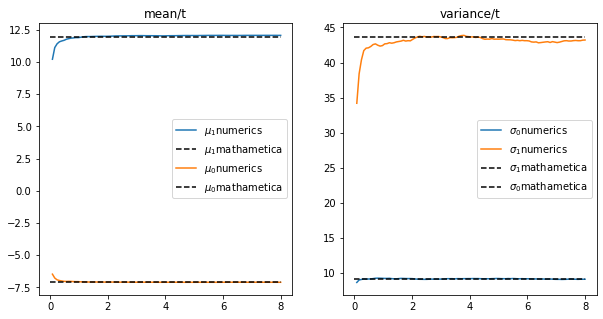

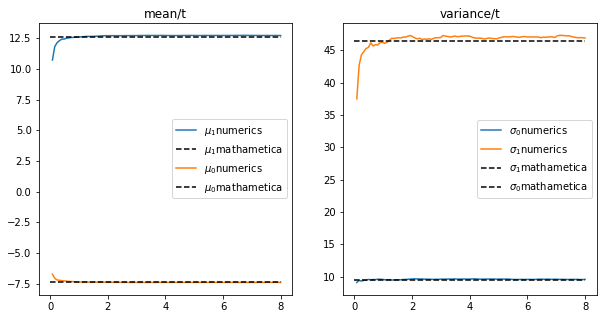

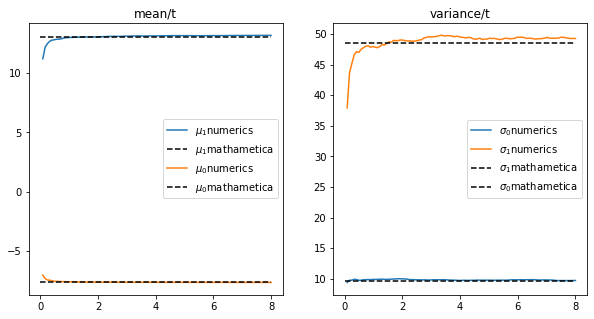

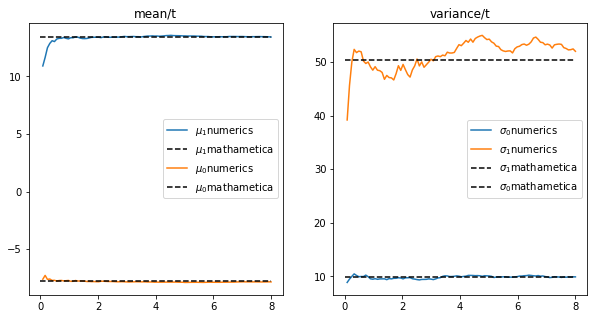

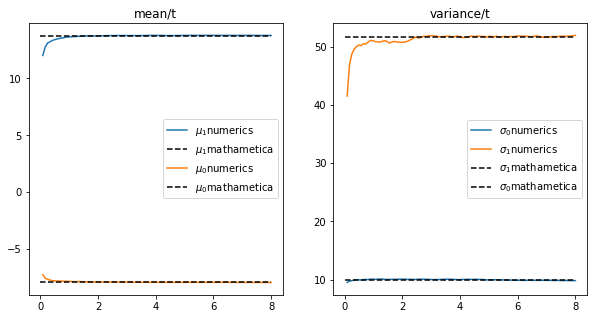

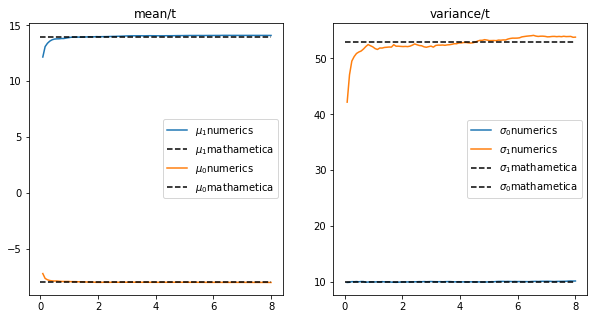

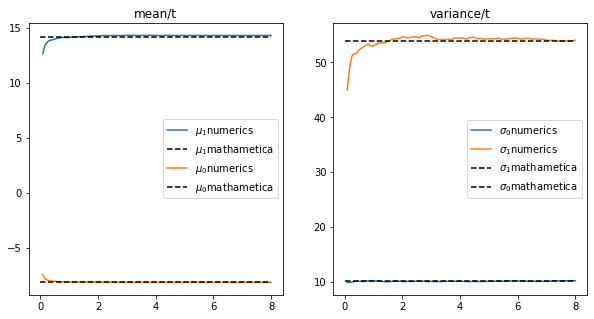

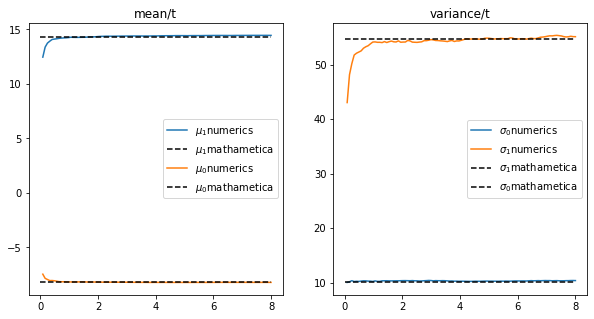

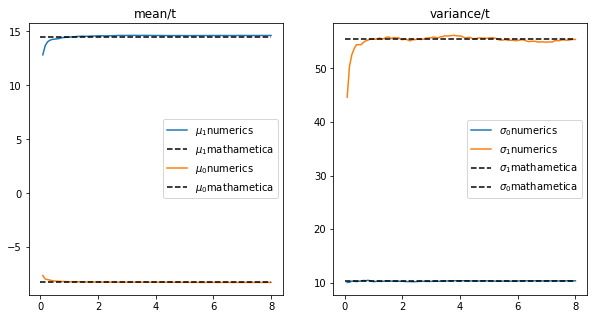

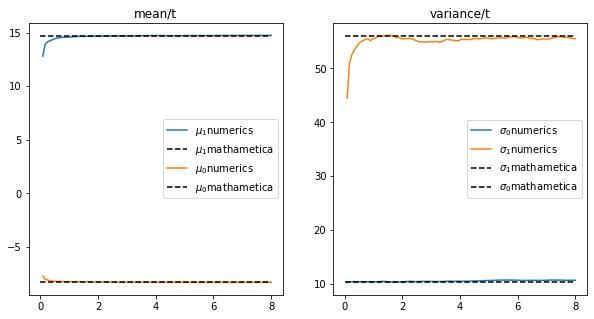

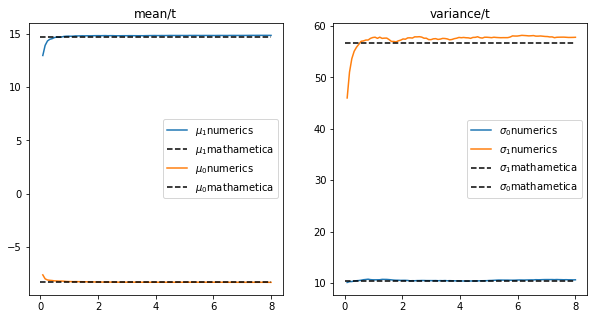

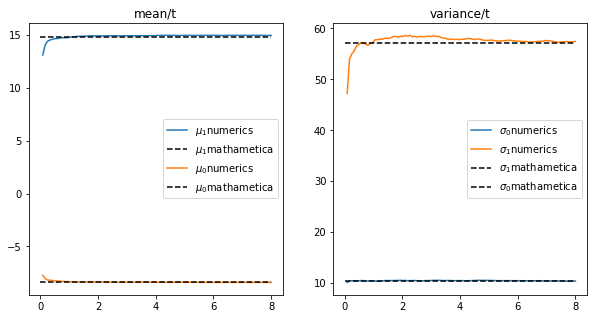

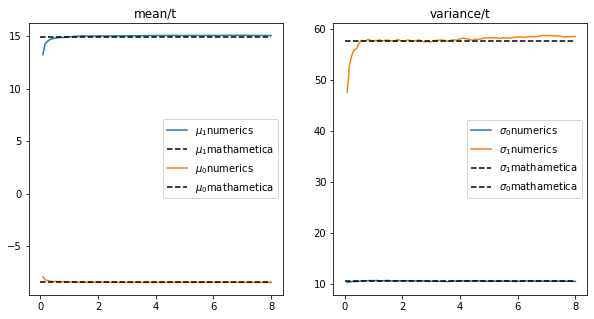

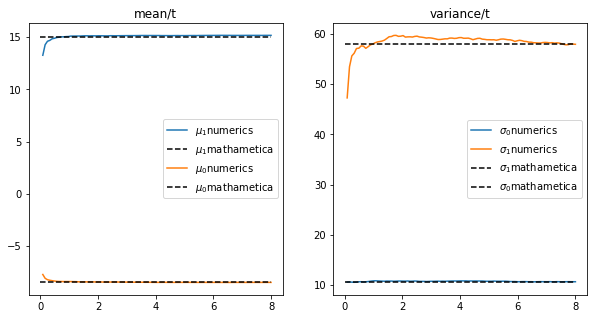

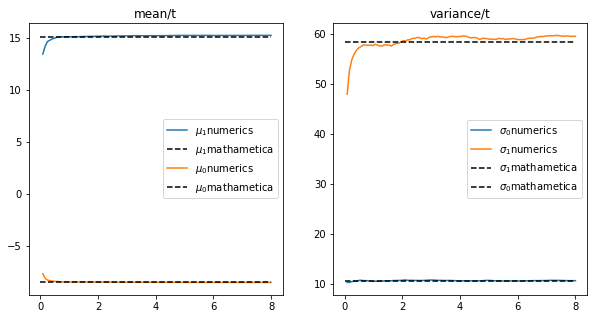

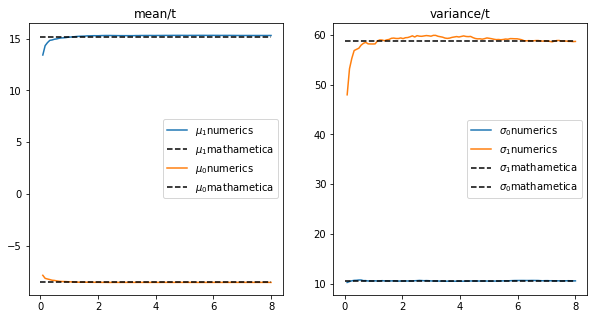

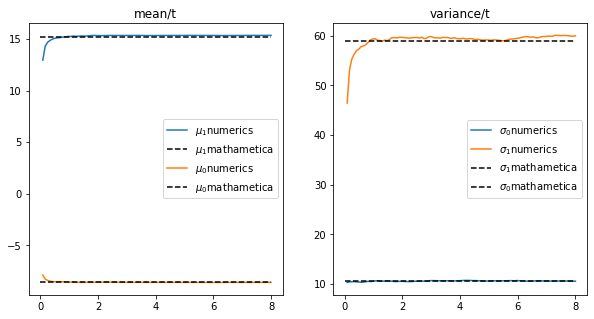

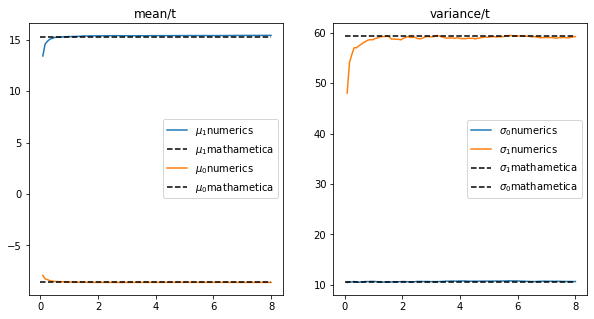

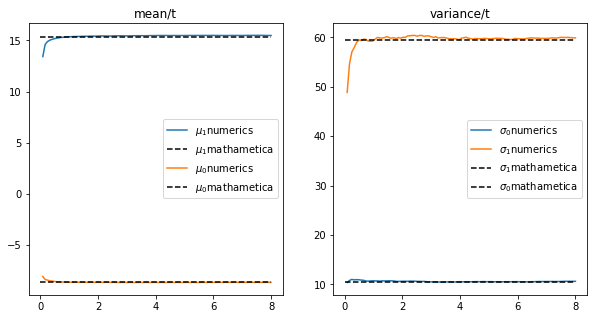

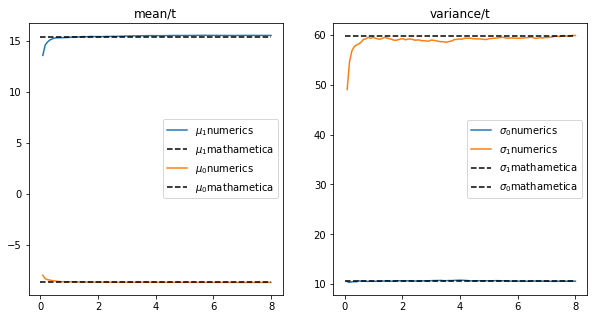

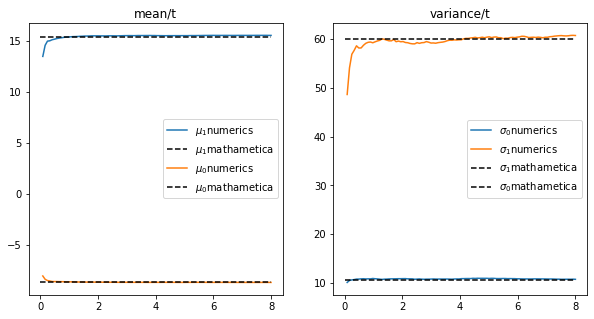

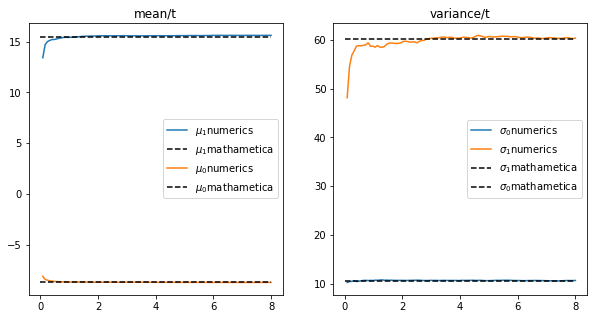

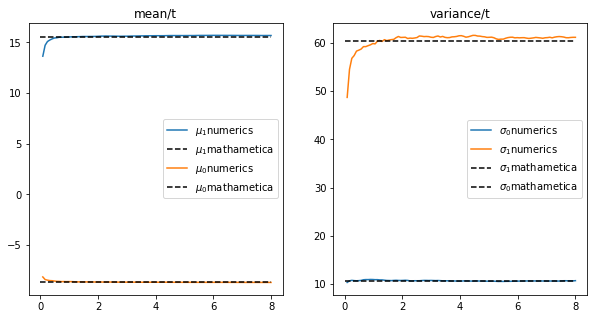

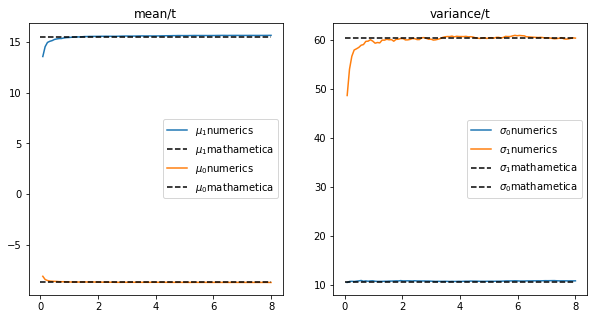

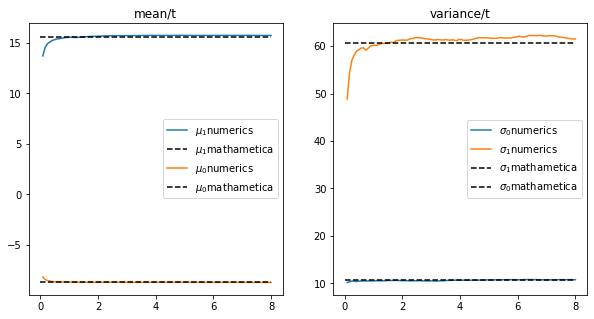

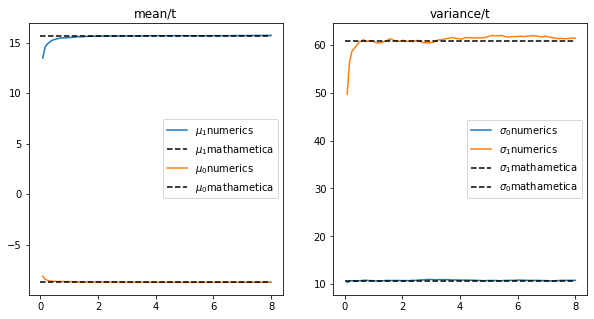

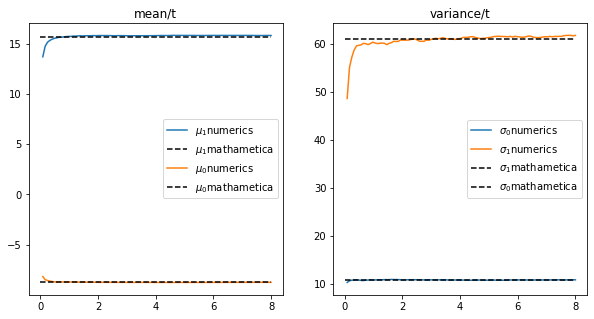

In [7]:
for gamma in gammas:
    path = get_def_path()+"sweep_gamma/{}/".format(gamma)+"T_{}_dt_{}/".format(total_time,dt)
    tims, m1, m0, s1, s0 = np.load(path+"momlik.npy")

    plt.figure(figsize=(10,5))
    ax=plt.subplot(121)
    ax.set_title("mean/t")
    ax.plot(tims, m0/tims,  label=r'$\mu_1$'+"numerics")
    ax.plot(tims, np.ones(len(tims))*give_mu(gamma,flip_params=1),'--',label=r'$\mu_1$'+"mathametica", color="black")
    ax.plot(tims, m1/tims, label=r'$\mu_0$'+"numerics")
    ax.plot(tims, -np.ones(len(tims))*give_mu(gamma,flip_params=0),'--',label=r'$\mu_0$'+"mathametica", color="black")
    ax.legend(prop={"size":10})
    ax=plt.subplot(122)
    ax.set_title("variance/t")
    ax.plot(tims, s1**2/tims, label=r'$\sigma_0$'+"numerics")
    ax.plot(tims, s0**2/tims,label=r'$\sigma_1$'+"numerics")
    ax.plot(tims, np.ones(len(tims))*give_var(gamma, flip_params=1),'--',label=r'$\sigma_1$'+"mathametica", color="black")
    ax.plot(tims, np.ones(len(tims))*give_var(gamma, flip_params=0) ,'--',label=r'$\sigma_0$'+"mathametica", color="black")
    ax.legend(prop={"size":10})
    plt.savefig("figures_gamma/{}.pdf".format(gamma))
    print(gamma)

/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


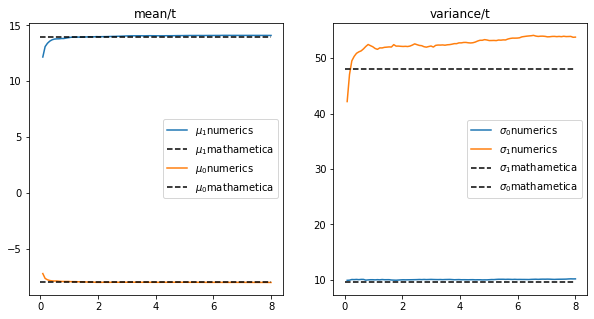

In [72]:
plt.figure(figsize=(10,5))
ax=plt.subplot(121)
ax.set_title("mean/t")
ax.plot(tims, m0/tims,  label=r'$\mu_1$'+"numerics")
ax.plot(tims, np.ones(len(tims))*give_mu(gamma,flip_params=1),'--',label=r'$\mu_1$'+"mathametica", color="black")
ax.plot(tims, m1/tims, label=r'$\mu_0$'+"numerics")
ax.plot(tims, -np.ones(len(tims))*give_mu(gamma,flip_params=0),'--',label=r'$\mu_0$'+"mathametica", color="black")
ax.legend(prop={"size":10})
ax=plt.subplot(122)
ax.set_title("variance/t")
ax.plot(tims, s1**2/tims, label=r'$\sigma_0$'+"numerics")
ax.plot(tims, s0**2/tims,label=r'$\sigma_1$'+"numerics")
ax.plot(tims, np.ones(len(tims))*give_var(gamma, flip_params=1),'--',label=r'$\sigma_1$'+"mathametica", color="black")
ax.plot(tims, np.ones(len(tims))*give_var(gamma, flip_params=0) ,'--',label=r'$\sigma_0$'+"mathametica", color="black")
ax.legend(prop={"size":10})
#plt.savefig("{}.pdf".format(gamma))

/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


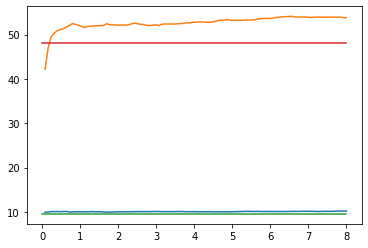

In [46]:
plt.plot(tims, m0/tims)
plt.plot(tims, np.ones(len(tims))*give_mu(gamma,flip_params=1))
plt.plot(tims, m1/tims)
plt.plot(tims, -np.ones(len(tims))*give_mu(gamma,flip_params=0))

plt.plot(tims, s1**2/tims)
plt.plot(tims, s0**2/tims)
plt.plot(tims, np.ones(len(tims))*give_var(gamma, flip_params=1))
plt.plot(tims, np.ones(len(tims))*give_var(gamma, flip_params=0) )        

In [35]:
var1

48.09695560618809

In [19]:
list(os.walk(path))

[('/data/uab-giq/scratch/matias/quantera/trajectories/mechanical_damp/sweep_gamma/3300.3225806451615/T_8.0_dt_0.0001/',
  ['figures', 'B6.0_db0.05_30000', 'B6.0_db0.05', 'B6.0_db0.05_1000'],
  ['statsL0.npy',
   'times_to_err_stoch.npy',
   'stop.pickle',
   'momlik.npy',
   'momdiff.npy',
   'statsL1.npy',
   'lik_cum.npy',
   'times_to_err_det.npy',
   'diff_cum.npy',
   'deter.pickle',
   'lik0_cum.npy',
   'statsdiff.npy',
   'st_cum.npy',
   'lik1_cum.npy']),
 ('/data/uab-giq/scratch/matias/quantera/trajectories/mechanical_damp/sweep_gamma/3300.3225806451615/T_8.0_dt_0.0001/figures',
  [],
  ['stopping_distrib_5.pdf',
   'stopping_distrib_30.pdf',
   'liks_distrib_indtime_5.pdf',
   'stopping_distrib_40.pdf',
   'liks_distrib_indtime_-1.pdf',
   'cuml1_t.pdf',
   'liks_distrib_indtime_1.pdf',
   'stopping_distrib_15.pdf',
   'cum_deltas_t.pdf',
   'stopping_distrib_20.pdf']),
 ('/data/uab-giq/scratch/matias/quantera/trajectories/mechanical_damp/sweep_gamma/3300.3225806451615/T_8.0

In [71]:
path_fig = path+"figures/"

In [75]:
import io
import fitz
from PIL import Image

file = path_fig+"stopping_distrib_5.pdf"
pdf_file = fitz.open(file)

# in case there is a need to loop through multiple PDF pages
for page_number in range(len(pdf_file)):
    page = pdf_file[page_number]
    rgb = page.get_pixmap()
    pil_image = Image.open(io.BytesIO(rgb.tobytes()))

NameError: name 'rgb' is not defined

In [83]:
rgb=pdf_file[0].getPixmap()

In [84]:
Image.open(io.BytesIO(rgb.tobytes()))

TypeError: a bytes-like object is required, not 'Pixmap'

In [87]:
from PIL import Image
im = Image.open(file)

UnidentifiedImageError: cannot identify image file '/data/uab-giq/scratch/matias/quantera/trajectories/mechanical_damp/sweep_gamma/3300.3225806451615/T_8.0_dt_0.0001/figures/stopping_distrib_5.pdf'

In [62]:
ll1, ll0 = [], []
for itraj in range(1,50):
    
    l11, l01 = load_gamma(gammas[1], itraj=itraj).T
    l00, l10 = load_gamma(gammas[1], itraj=itraj, flip_params=1).T
    ll1.append(l11-l01)
    ll0.append(l10-l00)

In [63]:
ll1 = np.stack(ll1)
ll0 = np.stack(ll0)

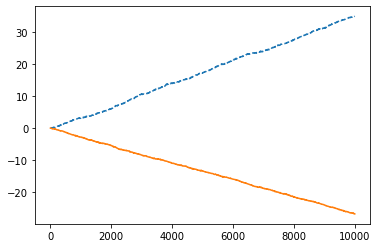

In [64]:
plt.plot(np.mean(ll0, axis=0), '--')
plt.plot(np.mean(ll1,axis=0))

In [34]:



cum1 = np.load(path+"lik1_cum.npy")
cum0 = np.load(path+"lik0_cum.npy")
dif_cumm = np.load(path+"diff_cum.npy")

momlik = np.load(path+"momlik.npy") ## [t, <l_0>, <l_1>, Std(l_0), Std(l_1)]
momdiff = np.load(path+"momdiff.npy")


statsL0 = np.load(path+"statsL0.npy")
statsL1 = np.load(path+"statsL1.npy")
statsdiff = np.load(path+"statsdiff.npy")

In [ ]:
lim = min(Ntraj, int(1e4))
    sll0 = np.stack([ll0[:lim,k] for k in ind_st]).T

/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


Text(0.5, 0, 'time')

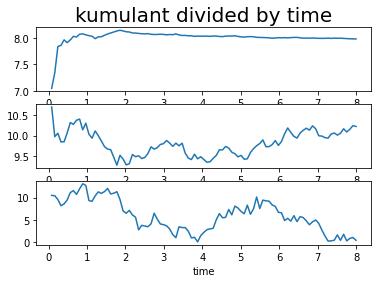

In [274]:
ax=plt.subplot(311)
ax.set_title("kumulant divided by time",size=20)

ax.plot(dif_cumm[0], np.abs(cum1[1])/cum1[0])
ax=plt.subplot(312)
ax.plot(dif_cumm[0], np.abs(cum1[2])/cum1[0])
ax=plt.subplot(313)
ax.plot(dif_cumm[0], np.abs(cum1[3])/cum1[0])
ax.set_xlabel("time")

Text(0.5, 0, 'time')

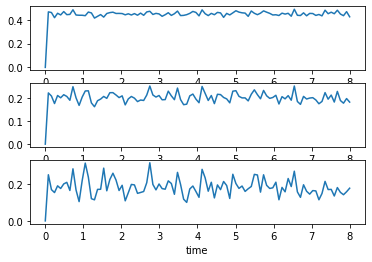

In [268]:
ax=plt.subplot(311)
ax.plot(dif_cumm[0], dif_cumm[1])
ax=plt.subplot(312)
ax.plot(dif_cumm[0], dif_cumm[2])
ax=plt.subplot(313)
ax.plot(dif_cumm[0], dif_cumm[3])
ax.set_xlabel("time")

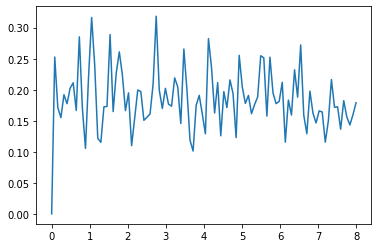

In [259]:
plt.plot(dif_cumm[0], dif_cumm[3])

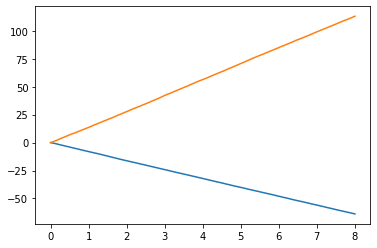

In [252]:
plt.plot(momlik[0], momlik[1])
plt.plot(momlik[0], momlik[2])

In [253]:
def get_histogram(stop):
    B = 8.
    dB = .2
    boundsB= np.arange(-B,B+dB,dB)

    bpos = boundsB[boundsB>=0]
    bneg = boundsB[boundsB<0]


    stops0 = [[] for k in range(len(bpos))]
    stops1 = [[] for k in range(len(bpos))]

    values1 = list(stop["_1"].values())
    values0 = list(stop["_0"].values())
    for k,val in enumerate(values1):
        if len(val)!=0:
            for indb in range(len(val)):
                if ~np.isnan([values1[k][indb]])[0] == True:
                    stops1[indb].append(np.squeeze(values1[k][indb]))

    for k,val in enumerate(values0):
        if len(val)!=0:
            for indb in range(len(val)):
                if ~np.isnan([values0[k][indb]])[0] == True:
                    stops0[indb].append(np.squeeze(values0[k][indb]))


    cons1, cons0 = [], []
    anals1, anals0 = [], []
    timbin0, timbin1 = [], []
    for indb, b in enumerate(bpos):
        counts1, bins1 = np.histogram(stops1[indb], 50, normed=True)
        counts0, bins0 = np.histogram(stops0[indb], 50, normed=True)

        timms1 = np.linspace(0,np.max(bins1), 100)
        timms0 = np.linspace(0,np.max(bins0), 100)

        timbins1 = .5*(bins1[1:] + bins1[:-1])
        timbins0 = .5*(bins0[1:] + bins0[:-1])

        cons1.append(counts1)
        cons0.append(counts0)

        timbin1.append(timbins1)
        timbin0.append(timbins0)
    return timbin1, timbin0, cons1, cons0

def fit_2moments(timind,l1_mean, l1_std):
    
    ini = 10
    fini = -1

    sqrtimind = np.array(np.sqrt(timind))
    timind = np.array(timind)

    mu, oomu = np.polyfit(timind[ini:fini], np.abs(l1_mean)[ini:fini],1)
    sigma, oosig = np.polyfit(np.array(np.sqrt(timind))[ini:fini], l1_std[ini:fini],1)
    
    return [mu, oomu], [sigma, oosig]

In [254]:
with open(path+"stop.pickle","rb") as f:
   stop = pickle.load(f)#, protocol=pickle.HIGHEST_PROTOCOL)
timbin1, timbin0, cons1, cons0 = get_histogram(stop)

def give_me_gauss(b, mu,sigma,xrange):
    gauss = lambda x,m,g: np.exp(-((x-m)**2)/(2*g**2))/np.sqrt(2*np.pi*g**2)
    xx = np.linspace(xrange[0], xrange[1],500)
    return xx, np.array([gauss(x, mu, sigma) for x in xx])

/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:32: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:33: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.


/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:7: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  import sys
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:8: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  


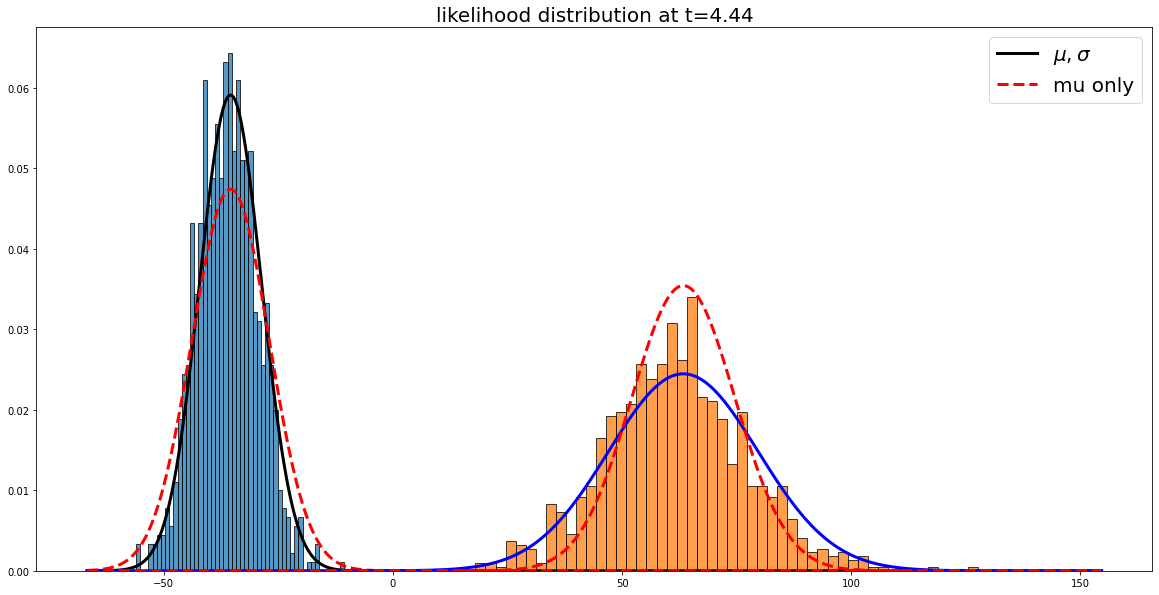

In [255]:
timstats = [times[k] for k in np.linspace(0,len(times)-1,statsL1.shape[1]).astype(int)]

[mu1, oomu1], [sigma1, oosig1] = fit_2moments(momlik[0],momlik[1], momlik[3])
[mu0, oomu0], [sigma0, oosig0] = fit_2moments(momlik[0],momlik[2], momlik[4])

indistats = 5
c1, b1 = np.histogram(statsL1[:,indistats], bins=50, normed=True)
c0, b0 = np.histogram(statsL0[:,indistats], bins=50, normed=True)



plt.figure(figsize=(20,10))
ax=plt.subplot()

t = timstats[indistats]
ax.set_title("likelihood distribution at t={}".format(np.round(t,2)),size=20)


ax.bar(b1[:-1], c1, edgecolor="black", width=b1[1]-b1[0], alpha=0.75)
ax.bar(b0[:-1], c0, edgecolor="black",width=b0[1]-b0[0], alpha=0.75)

xrange = (1.2*np.min([b0,b1]), 1.2*np.max([b0,b1]))

bb,gg = give_me_gauss(b1, -mu1*t,sigma1*np.sqrt(t), xrange)

ax.plot(bb,gg, color="black", linewidth=3, label=r'$\mu, \sigma$')
bb,gg = give_me_gauss(b1, -mu1*t,np.sqrt(2*mu1)*np.sqrt(t), xrange)
ax.plot(bb,gg, '--', color="red",linewidth=3, label="mu only")

bb,gg = give_me_gauss(b0, mu0*t,sigma0*np.sqrt(t), xrange)
ax.plot(bb,gg,color="blue", linewidth=3)
bb,gg = give_me_gauss(b0, mu0*t,np.sqrt(2*mu0)*np.sqrt(t), xrange)
ax.plot(bb,gg, '--', color="red",linewidth=3)

ax.legend(prop={"size":20})

In [256]:
np.argmin(np.abs(bpos-5))

25

/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


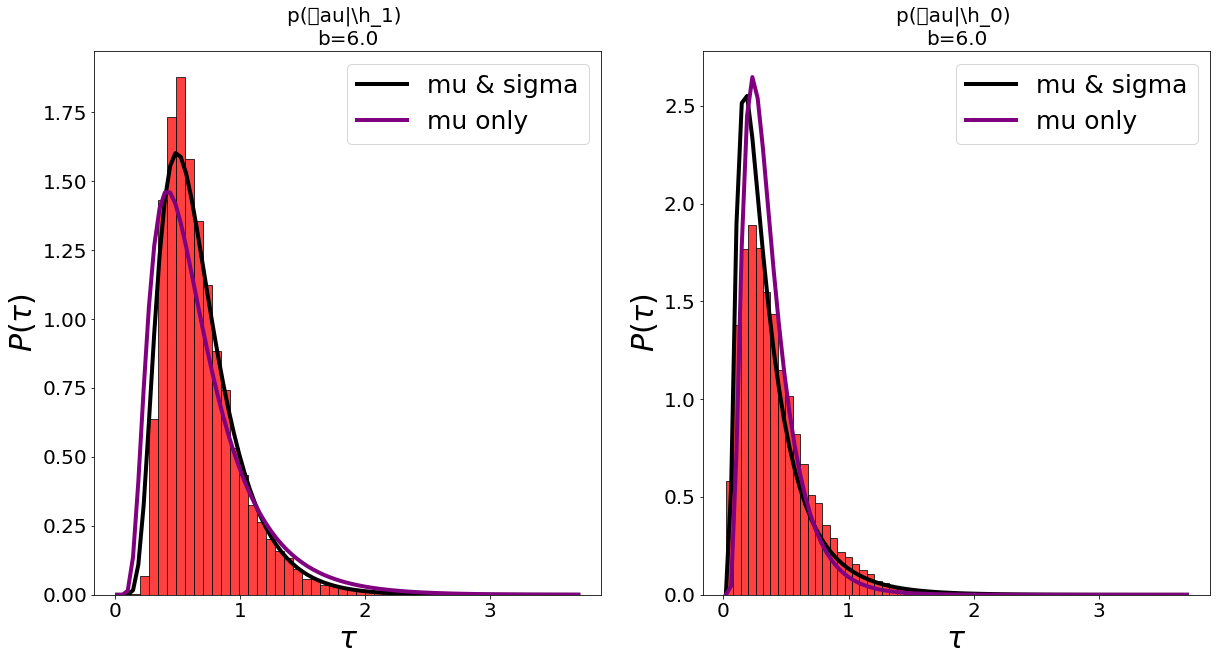

In [245]:
def prob_craft(t, b, mu, S):
    div = (np.sqrt(2*np.pi)*S*(t**(3/2)))
    return  abs(b)*np.exp(-((abs(b)-mu*t)**2)/(2*t*(S**2)))/div

#muu = l1[-1]/timind[-1]

LS, TS = 30, 20
plt.figure(figsize=(20,10))
ax = plt.subplot(121)
indb = 30

timm =  np.linspace(np.min(timbin1),np.max(timbin1),100)

[mu0, oomu0], [sigma0, oosig0] = fit_2moments(momlik[0],momlik[2], momlik[4])
[mu1, oomu1], [sigma1, oosig1] = fit_2moments(momlik[0],momlik[1], momlik[3])


popo = [prob_craft(tt, bpos[indb] , mu1, np.sqrt(2*mu1)) for tt in timm]
good = [prob_craft(tt, bpos[indb] , mu1, sigma1) for tt in timm]

ax.set_title("p(\tau|\h_1) \nb={}".format(np.round(bpos[indb],3)), size=20)
ax.plot(timm,good, linewidth=4,color="black", label="mu & sigma")
ax.plot(timm,popo, linewidth=4, color="purple", label="mu only")

ax.bar(timbin1[indb], cons1[indb], width=timbin1[indb][1]-timbin1[indb][0], color="red", alpha=0.75, edgecolor="black",)#, label="simulations")
ax.set_xlabel(r'$\tau$',size=LS)
ax.set_ylabel(r'$P(\tau)$', size=LS)
ax.tick_params(axis='both', which='major', labelsize=TS)
ax.legend(prop={"size":25})

ax=plt.subplot(122)

popo = [prob_craft(tt, bpos[indb] , abs(mu0), np.sqrt(2*abs(mu0))) for tt in timm]
good = [prob_craft(tt, bpos[indb] , abs(mu0), abs(sigma0)) for tt in timm]

ax.set_title("p(\tau|\h_0) \nb={}".format(np.round(bpos[indb],3)), size=20)
ax.plot(timm,good, linewidth=4,color="black", label="mu & sigma")
ax.plot(timm,popo, linewidth=4, color="purple", label="mu only")

ax.bar(timbin0[indb], cons0[indb], width=timbin0[indb][1]-timbin0[indb][0], color="red", alpha=0.75, edgecolor="black",)#, label="simulations")
ax.set_xlabel(r'$\tau$',size=LS)
ax.set_ylabel(r'$P(\tau)$', size=LS)
ax.tick_params(axis='both', which='major', labelsize=TS)
ax.legend(prop={"size":25})

In [ ]:
dfs0 = np.stack(dfs0)
dfs1 = np.stack(dfs1)

In [ ]:
mu0

14.951010636737537

In [ ]:
mu1

8.416717806514157

In [27]:
[2*mu0/(4*eta*kappa)]

[0.8306117020409743]

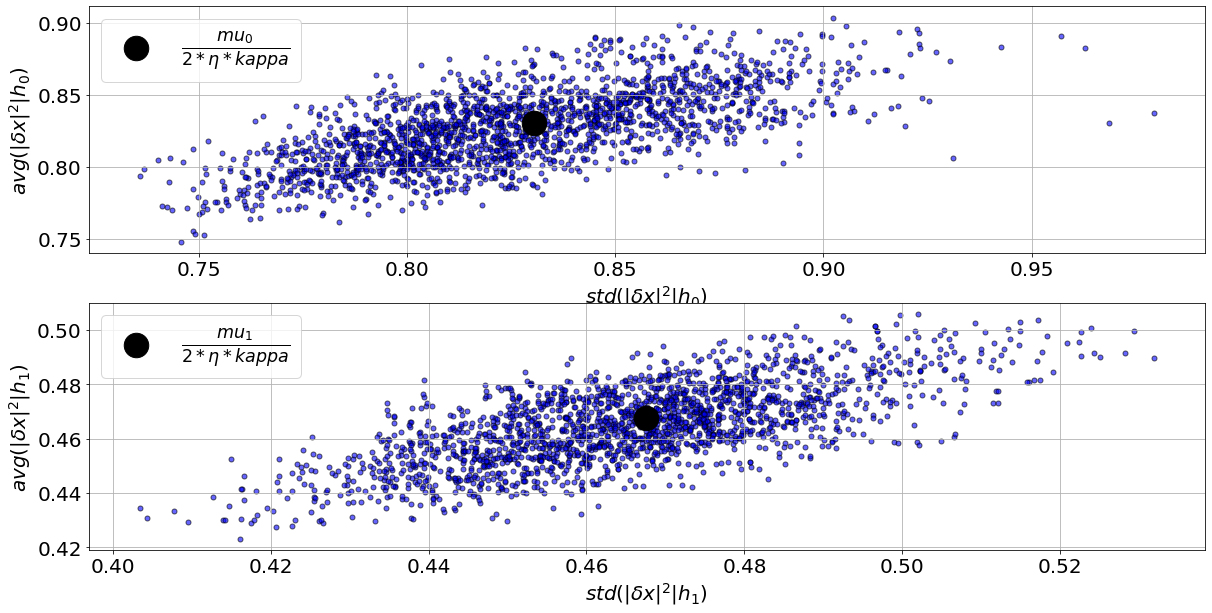

In [28]:
plt.figure(figsize=(20,10))
ax=plt.subplot(211)

ss=25
plt.grid()
ax.tick_params(axis='both', which='major', labelsize=TS)
ax.scatter(np.std(dfs0, axis=0)[int(8e3):], np.mean(dfs0, axis=0)[int(8e3):], s=ss,edgecolor="black",color="blue", alpha=.6)
ax.scatter([2*mu0/(4*eta*kappa)], [2*mu0/(4*eta*kappa)], s=600, alpha=1, color="black", marker='o', label=r'$\frac{mu_0}{2*\eta*kappa}$')
ax.set_xlabel(r'$std(|\delta x|^2|h_0)$', size=20)
ax.set_ylabel(r'$avg(|\delta x|^2|h_0)$', size=20)
ax.legend(prop={"size":25})

ax=plt.subplot(212)

ss=25
plt.grid()
ax.tick_params(axis='both', which='major', labelsize=TS)
ax.scatter(np.std(dfs1, axis=0)[int(8e3):], np.mean(dfs1, axis=0)[int(8e3):], s=ss,edgecolor="black",color="blue", alpha=.6)
ax.scatter([2*mu1/(4*eta*kappa)], [2*mu1/(4*eta*kappa)], s=600, alpha=1, color="black", marker='o', label=r'$\frac{mu_1}{2*\eta*kappa}$')

ax.set_xlabel(r'$std(|\delta x|^2|h_1)$', size=20)
ax.set_ylabel(r'$avg(|\delta x|^2|h_1)$', size=20)
ax.legend(prop={"size":25})

In [29]:

gamma = gammas[-1]

h0 = gamma0, omega0, n0, eta0, kappa0 = 100., 0., 1., 1., 9
h1 = gamma1, omega1, n1, eta1, kappa1 = gamma, 0., 1., 1., 9

params = [h1,h0]
[gamma1, omega1, n1, eta1, kappa1],[gamma0, omega0, n0, eta0, kappa0],   = params
model_cte = 1
def give_matrices(gamma, omega, n, eta, kappa, model="mechanical_damp"):
    A = np.array([[-gamma/2, omega],[-omega, -gamma/2]])
    if "mechanical_damp" in model:
        mm = np.eye(2)#homodyne but in Rotating Frame
    elif model =="mechanical_freq":
        mm = np.array([1.,0.],[0.,0.])#homodyne
    C = np.sqrt(4*eta*kappa)*mm#
    D = np.diag([gamma*(n+0.5) + kappa]*2)
    G = np.zeros((2,2))
    return A, C, D,G

A1, C1, D1, G1 = give_matrices(gamma1, omega1, n1, eta1, kappa1)
A0, C0, D0, G0 = give_matrices(gamma0, omega0, n0, eta0, kappa0)

proj_C = np.linalg.pinv(C1/C1[0,0])
x1in ,p1in, x0in, p0in, dyxin, dypin, lin0, lin1 = np.zeros(8)
sigma1_sst = solve_continuous_are( (A1-np.dot(G1.T,C1)).T, C1.T, D1 - np.dot(G1.T, G1), np.eye(2))[1,1] #### A.T because the way it's implemented!
sigma0_sst = solve_continuous_are( (A0-np.dot(G0.T,C0)).T, C0.T, D0 - np.dot(G0.T, G0), np.eye(2))[1,1] #### A.T because the way it's implemented!

In [30]:
def variance_ell(eta, kappa, sigma0, sigma1, gamma0, gamma1):
    return (-4*(-2*eta*gamma0**2*gamma1**2*kappa*sigma0**2 - eta*gamma0**3*gamma1**2*kappa*sigma0**2 - 4*eta*gamma0*gamma1**3*kappa*sigma0**2 - 2*eta*gamma0**2*gamma1**3*kappa*sigma0**2 - 2*eta*gamma1**4*kappa*sigma0**2 - eta*gamma0*gamma1**4*kappa*sigma0**2 + 4*eta*gamma0**2*gamma1**2*kappa*np.sqrt(eta*kappa)*sigma0**3 + 8*eta*gamma0*gamma1**3*kappa*np.sqrt(eta*kappa)*sigma0**3 + 4*eta*gamma1**4*kappa*np.sqrt(eta*kappa)*sigma0**3 + 4*eta*gamma0**3*gamma1*kappa*sigma0*sigma1 + 4*eta*gamma0**3*gamma1**2*kappa*sigma0*sigma1 - 4*eta*gamma0*gamma1**3*kappa*sigma0*sigma1 + 4*eta*gamma0**2*gamma1**3*kappa*sigma0*sigma1 - 64*eta**2*gamma0**2*gamma1*kappa**2*sigma0**2*sigma1 - 16*eta**2*gamma0**3*gamma1*kappa**2*sigma0**2*sigma1 - 128*eta**2*gamma0*gamma1**2*kappa**2*sigma0**2*sigma1 - 64*eta**2*gamma0**2*gamma1**2*kappa**2*sigma0**2*sigma1 - 64*eta**2*gamma1**3*kappa**2*sigma0**2*sigma1 - 48*eta**2*gamma0*gamma1**3*kappa**2*sigma0**2*sigma1 - 32*eta*gamma0**2*gamma1**2*kappa*np.sqrt(eta*kappa)*sigma0**2*sigma1 - 16*eta*gamma0*gamma1**3*kappa*np.sqrt(eta*kappa)*sigma0**2*sigma1 + 64*eta**2*gamma0**2*gamma1*kappa**2*np.sqrt(eta*kappa)*sigma0**3*sigma1 + 352*eta**2*gamma0*gamma1**2*kappa**2*np.sqrt(eta*kappa)*sigma0**3*sigma1 + 224*eta**2*gamma1**3*kappa**2*np.sqrt(eta*kappa)*sigma0**3*sigma1 + 2*eta*gamma0**4*kappa*sigma1**2 + 4*eta*gamma0**3*gamma1*kappa*sigma1**2 - eta*gamma0**4*gamma1*kappa*sigma1**2 + 2*eta*gamma0**2*gamma1**2*kappa*sigma1**2 - 2*eta*gamma0**3*gamma1**2*kappa*sigma1**2 - eta*gamma0**2*gamma1**3*kappa*sigma1**2 - 64*eta**2*gamma0**2*gamma1*kappa**2*sigma0*sigma1**2 + 80*eta**2*gamma0**3*gamma1*kappa**2*sigma0*sigma1**2 - 128*eta**2*gamma0*gamma1**2*kappa**2*sigma0*sigma1**2 + 112*eta**2*gamma0**2*gamma1**2*kappa**2*sigma0*sigma1**2 + 16*eta*gamma0**3*gamma1*kappa*np.sqrt(eta*kappa)*sigma0*sigma1**2 + 32*eta*gamma0**2*gamma1**2*kappa*np.sqrt(eta*kappa)*sigma0*sigma1**2 - 256*eta**3*gamma0**2*kappa**3*sigma0**2*sigma1**2 - 64*eta**3*gamma0**3*kappa**3*sigma0**2*sigma1**2 - 1024*eta**3*gamma0*gamma1*kappa**3*sigma0**2*sigma1**2 - 704*eta**3*gamma0**2*gamma1*kappa**3*sigma0**2*sigma1**2 - 640*eta**3*gamma1**2*kappa**3*sigma0**2*sigma1**2 - 832*eta**3*gamma0*gamma1**2*kappa**3*sigma0**2*sigma1**2 - 768*eta**2*gamma0**2*gamma1*kappa**2*np.sqrt(eta*kappa)*sigma0**2*sigma1**2 - 640*eta**2*gamma0*gamma1**2*kappa**2*np.sqrt(eta*kappa)*sigma0**2*sigma1**2 + 256*eta**3*gamma0**2*kappa**3*np.sqrt(eta*kappa)*sigma0**3*sigma1**2 + 5120*eta**3*gamma0*gamma1*kappa**3*np.sqrt(eta*kappa)*sigma0**3*sigma1**2 + 4608*eta**3*gamma1**2*kappa**3*np.sqrt(eta*kappa)*sigma0**3*sigma1**2 + 32*eta**2*gamma0**3*kappa**2*sigma1**3 - 8*eta**2*gamma0**4*kappa**2*sigma1**3 + 32*eta**2*gamma0**2*gamma1*kappa**2*sigma1**3 - 32*eta**2*gamma0**3*gamma1*kappa**2*sigma1**3 - 24*eta**2*gamma0**2*gamma1**2*kappa**2*sigma1**3 - 4*eta*gamma0**4*kappa*np.sqrt(eta*kappa)*sigma1**3 - 8*eta*gamma0**3*gamma1*kappa*np.sqrt(eta*kappa)*sigma1**3 - 4*eta*gamma0**2*gamma1**2*kappa*np.sqrt(eta*kappa)*sigma1**3 - 512*eta**3*gamma0**2*kappa**3*sigma0*sigma1**3 + 384*eta**3*gamma0**3*kappa**3*sigma0*sigma1**3 - 1280*eta**3*gamma0*gamma1*kappa**3*sigma0*sigma1**3 + 1024*eta**3*gamma0**2*gamma1*kappa**3*sigma0*sigma1**3 + 224*eta**2*gamma0**3*kappa**2*np.sqrt(eta*kappa)*sigma0*sigma1**3 + 672*eta**2*gamma0**2*gamma1*kappa**2*np.sqrt(eta*kappa)*sigma0*sigma1**3 - 2048*eta**4*gamma0*kappa**4*sigma0**2*sigma1**3 - 2560*eta**4*gamma0**2*kappa**4*sigma0**2*sigma1**3 - 2048*eta**4*gamma1*kappa**4*sigma0**2*sigma1**3 - 6144*eta**4*gamma0*gamma1*kappa**4*sigma0**2*sigma1**3 - 4864*eta**3*gamma0**2*kappa**3*np.sqrt(eta*kappa)*sigma0**2*sigma1**3 - 8192*eta**3*gamma0*gamma1*kappa**3*np.sqrt(eta*kappa)*sigma0**2*sigma1**3 + 24576*eta**4*gamma0*kappa**4*np.sqrt(eta*kappa)*sigma0**3*sigma1**3 + 40960*eta**4*gamma1*kappa**4*np.sqrt(eta*kappa)*sigma0**3*sigma1**3 + 128*eta**3*gamma0**2*kappa**3*sigma1**4 - 128*eta**3*gamma0**3*kappa**3*sigma1**4 - 192*eta**3*gamma0**2*gamma1*kappa**3*sigma1**4 - 64*eta**2*gamma0**3*kappa**2*np.sqrt(eta*kappa)*sigma1**4 - 64*eta**2*gamma0**2*gamma1*kappa**2*np.sqrt(eta*kappa)*sigma1**4 - 4096*eta**4*gamma0*kappa**4*sigma0*sigma1**4 + 3072*eta**4*gamma0**2*kappa**4*sigma0*sigma1**4 + 3328*eta**3*gamma0**2*kappa**3*np.sqrt(eta*kappa)*sigma0*sigma1**4 - 16384*eta**5*gamma0*kappa**5*sigma0**2*sigma1**4 - 32768*eta**4*gamma0*kappa**4*np.sqrt(eta*kappa)*sigma0**2*sigma1**4 + 131072*eta**5*kappa**5*np.sqrt(eta*kappa)*sigma0**3*sigma1**4 - 512*eta**4*gamma0**2*kappa**4*sigma1**5 - 256*eta**3*gamma0**2*kappa**3*np.sqrt(eta*kappa)*sigma1**5))/(gamma0**2*(gamma1 + 8*eta*kappa*sigma1)**2*(gamma0 + gamma1 + 8*eta*kappa*sigma1)**2)

In [31]:
var_giulio = variance_ell(eta0, kappa0, sigma1,sigma0, gamma1, gamma0)

In [32]:
np.sqrt(var_giulio*8)

4.970835368702861

In [33]:
sigma0/np.sqrt(t)

2.6321505280363025

In [34]:
def retrieve_liks(gamma):

    dfs1 = []
    dfs0 = []

    ers = []
    liks1, liks0 = [], []
    for itraj in tqdm(range(1,1000)):    
        try:

            [l0_1,l1_1], [l1_0,l0_0] = load_gamma(gamma, itraj=itraj,what="logliks.npy", flip_params=0).T, load_gamma(gamma, itraj=itraj,what="logliks.npy", flip_params=1).T
            log_lik_ratio, log_lik_ratio_swap = l1_1-l0_1, l1_0-l0_0

            liks1.append(log_lik_ratio)
            liks0.append(log_lik_ratio_swap)
            st11, st01 = load_gamma(gamma, itraj=itraj,what="states1.npy", flip_params=0).T, load_gamma(gamma, itraj=itraj,what="states0.npy", flip_params=0).T
            st10, st00 = load_gamma(gamma, itraj=itraj,what="states1.npy", flip_params=1).T, load_gamma(gamma, itraj=itraj,what="states0.npy", flip_params=1).T

            dfs1.append(np.einsum('tj,tj->j',st11 - st01,st11 - st01))
            dfs0.append(np.einsum('tj,tj->j',st10 - st00,st10 - st00))

        except Exception:
            print("er", itraj, gamma)
            ers.append(itraj)
    return np.stack(liks1), np.stack(liks0)

In [ ]:
from scipy.stats import skew 

In [35]:
l = []
for g in gammas[::10]:
    l.append(retrieve_liks(g))

100%|██████████| 999/999 [02:30<00:00,  6.63it/s]


In [39]:
skews = [skew(k[0], axis=0) for k in l]

Text(0, 0.5, '|Skewness| = $\\frac{m_3}{m_2^{3/2}}\\;, m_k = \\frac{1}{N} \\sum_i (x_i - \\bar{x})^k$')

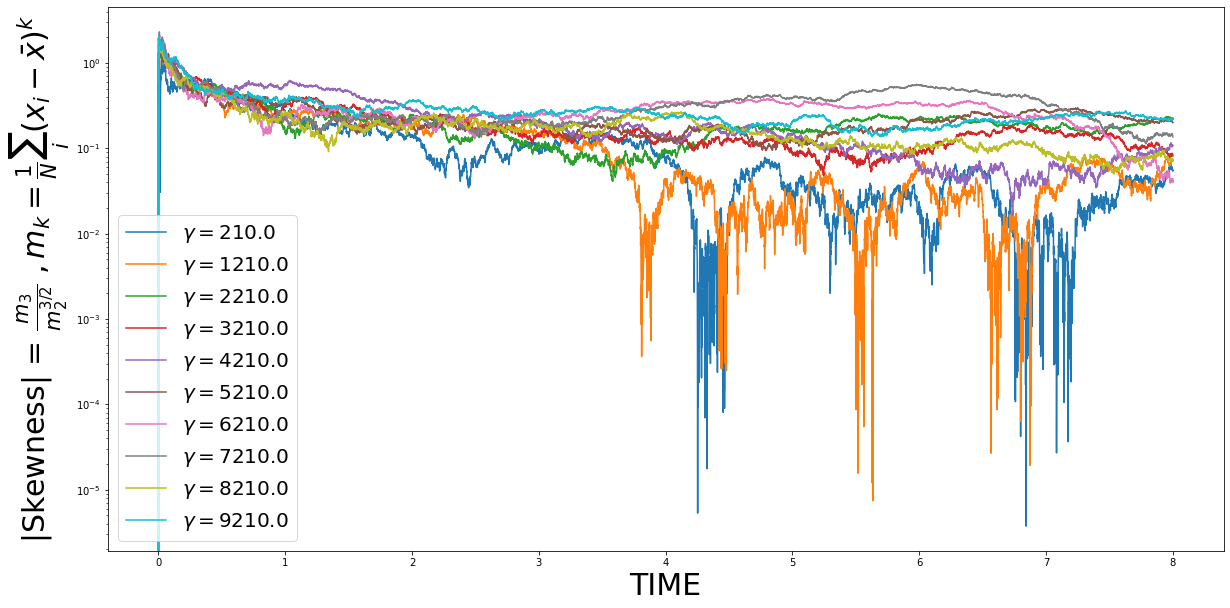

In [44]:
plt.figure(figsize=(20,10))
ax = plt.subplot(111)
for s, g in zip(np.abs(skews), gammas[::10]): 
    ax.plot(timind, s, label=r'$\gamma = {}$'.format(g))
    ax.set_yscale("log")
ax.legend(prop={"size":20})
ax.set_xlabel("TIME",size=30)
ax.set_ylabel("|Skewness| = "+r'$\frac{m_3}{m_2^{3/2}}\;, m_k = \frac{1}{N} \sum_i (x_i - \bar{x})^k$',size=30)

In [40]:
np.save("likelihoods_selected_gamas",np.stack(l))

In [65]:
lst = np.stack(l)

In [46]:
lst.shape

(10, 2, 999, 10000)

In [66]:
lst = lst[:,:,:,::100]

In [67]:
np.save("liks_gamma_hypothesis_seed_time", lst)

In [68]:
import numpy as np
import matplotlib.pyplot as plt 

liks = np.load("liks_gamma_hypothesis_seed_time.npy")
times = np.linspace(0,8+1e-5, int(1e4))[::100]

In [81]:
gammas = np.array(list(range(210,10000,100))).astype(np.float64)
gammas_here =  gammas[::10]

In [69]:
liks.shape

(10, 2, 999, 100)

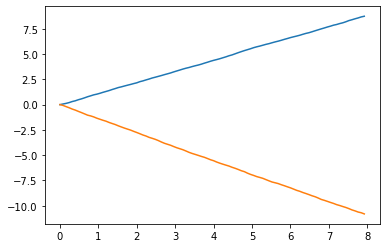

In [71]:
plt.plot(times, np.mean(liks[0,0,:,:],axis=0))
plt.plot(times, np.mean(liks[0,1,:,:],axis=0))

In [79]:
def fit_2moments(times,liks1, ini=0, fini=-1):
    """
    given times (1d array) and liks1 of shape (N, len(times)), where N is the number of trajectories
    retrieves mean and standard deviation assuming they 
    scale linearly with times and sqrt(times) respectively
    
    """
    l1_mean = np.mean(liks1, axis=0)
    l1_std = np.std(liks1, axis=0)

    sqrtimind = np.array(np.sqrt(times))

    mu, oomu = np.polyfit(times[ini:fini], np.abs(times)[ini:fini],1)
    sigma, oosig = np.polyfit(np.array(np.sqrt(times))[ini:fini], l1_std[ini:fini],1)
    
    return [mu, oomu], [sigma, oosig]

In [82]:
sigma = {}
for ind,gamma in enumerate(gammas_here):
    print(ind)
    sigma[gamma] = fit_2moments(times, liks[ind,0,:,:])[1][0]

0
1
2
3
4
5
6
7
8
9


Text(0, 0.5, '$Var[\\ell] (gaussian model)$')

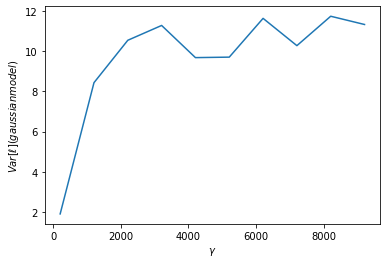

In [85]:
plt.plot(sigma.keys(), np.array(list(sigma.values()))**2)
plt.xlabel(r'$\gamma$')
plt.ylabel(r'$Var[\ell] (gaussian model)$')

In [ ]:
plt.figure(figsize=(20,10))
ax=plt.subplot()
ax.set_title("likelihood distribution at t={}\n gamma = {}".format(np.round(t,2), gamma),size=20)
ax.bar(b1[:-1], c1, edgecolor="black", width=b1[1]-b1[0], alpha=0.75)

ax.bar(b0[:-1], c0, edgecolor="black",width=b0[1]-b0[0], alpha=0.75)

xrange = (1.2*np.min([b0,b1]), 1.2*np.max([b0,b1]))
[mu1, oomu1], [sigma1, oosig1] = fit_2moments(timind,liks1)
[mu0, oomu0], [sigma0, oosig0] = fit_2moments(timind,liks0)

bb,gg = give_me_gauss(b1, mu1*t,sigma1*np.sqrt(t), xrange)

ax.plot(bb,gg, color="black", linewidth=3)
bb,gg = give_me_gauss(b1, mu1*t,np.sqrt(2*mu1)*np.sqrt(t), xrange)
ax.axvline(mu1*t, linewidth=5, color="black", alpha=0.4)
ax.axvline(-abs(mu0*t), linewidth=5, color="black", alpha=0.4)

ax.plot(bb,gg, '--', color="red",linewidth=3, label="mu only")

bb,gg = give_me_gauss(b0, -mu0*t,sigma0*np.sqrt(t), xrange)
ax.plot(bb,gg,color="blue", linewidth=3)
bb,gg = give_me_gauss(b0, -mu0*t,np.sqrt(2*mu0)*np.sqrt(t), xrange)
ax.plot(bb,gg, '--', color="red",linewidth=3, label="mu only")

ax.legend(prop={"size":20})

In [73]:
var_giulio = variance_ell(eta0, kappa0, sigma0,sigma1, gamma1, gamma0)

In [74]:
var_giulio

0.9892580797277969

In [64]:
mu0

15.76391961111046

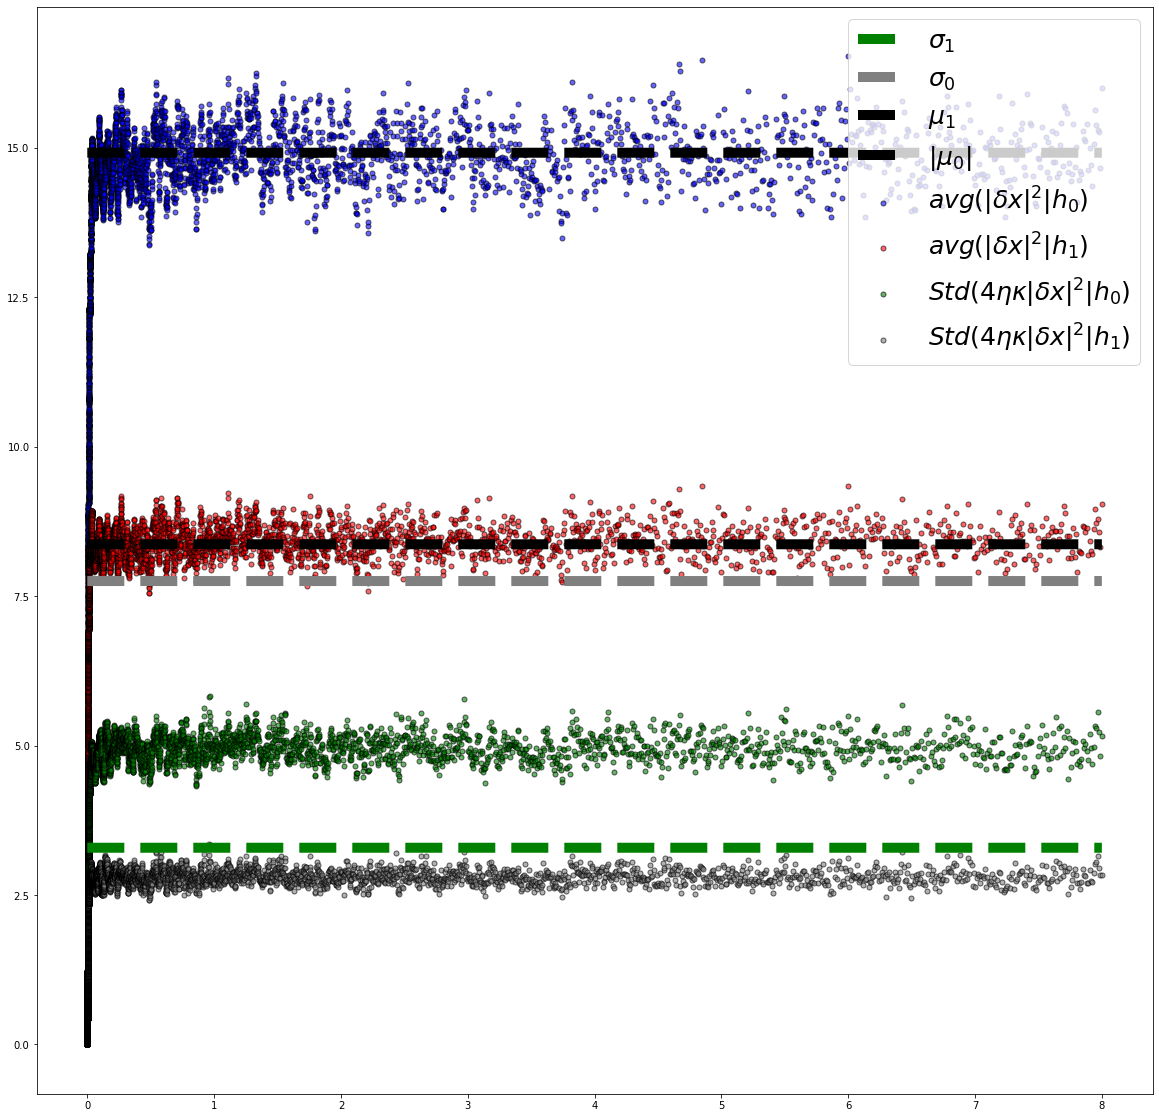

In [301]:
plt.figure(figsize=(20,20))
ax=plt.subplot(111)

ss=25


ax.scatter(timind, 4*eta*kappa*np.mean(dfs0, axis=0)/2, s=ss,edgecolor="black",color="blue", alpha=.6,label=r'$avg(|\delta x|^2|h_0)$')
ax.scatter(timind, 4*eta*kappa*np.mean(dfs1, axis=0)/2, s=ss,edgecolor="black",color="red", alpha=.6,label=r'$avg(|\delta x|^2|h_1)$')

ax.scatter(timind, np.sqrt(4*eta*kappa)*np.std(dfs0, axis=0),s=ss,edgecolor="black",alpha=0.6, color="green", label=r'$Std(4 \eta \kappa |\delta x|^2|h_0)$')
ax.scatter(timind, np.sqrt(4*eta*kappa)*np.std(dfs1, axis=0),s=ss, edgecolor="black",alpha=0.6, color="grey", label=r'$Std(4 \eta \kappa |\delta x|^2|h_1)$')

ax.plot(timind, np.ones(len(timind))*sigma1, '--',linewidth=10, color="green",label=r'$\sigma_1$')
ax.plot(timind, np.ones(len(timind))*sigma0, '--',linewidth=10, color="grey", label=r'$\sigma_0$')


ax.plot(timind, np.ones(len(timind))*mu1, '--',linewidth=10, color="black",label=r'$\mu_1$')
ax.plot(timind, np.ones(len(timind))*abs(mu0), '--',linewidth=10, color="black", label=r'$|\mu_0|$')

ax.legend(prop={"size":25})

/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


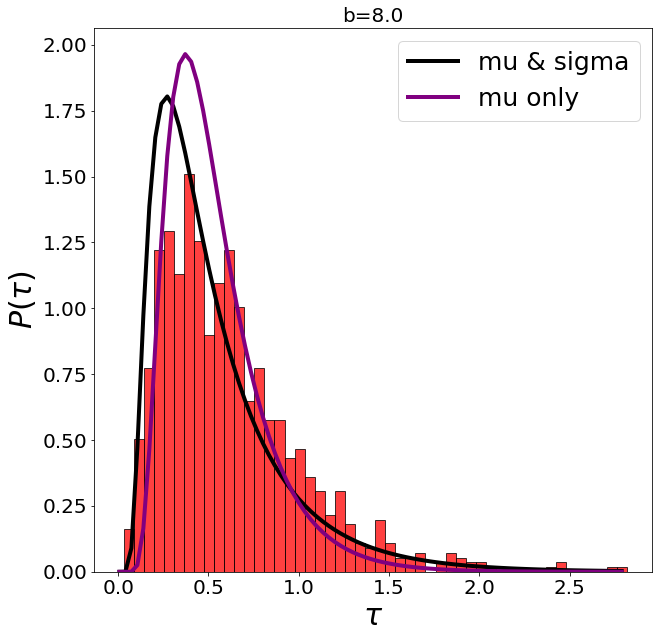

In [251]:
def prob_craft(t, b, mu, S):
    div = (np.sqrt(2*np.pi)*S*(t**(3/2)))
    return  abs(b)*np.exp(-((abs(b)-mu*t)**2)/(2*t*(S**2)))/div

#muu = l1[-1]/timind[-1]

LS, TS = 30, 20
plt.figure(figsize=(10,10))
ax = plt.subplot(111)
indb = -1

timm =  np.linspace(np.min(timbin0),np.max(timbin0),100)



In [239]:
def give_drift(h0, h1):
    [gamma1, omega1, n1, eta1, kappa1] = h1
    [gamma0, omega0, n0, eta0, kappa0] = h0
    Su1 = n1 + 0.5 + (kappa1 / gamma1)
    Su0 = n0 + 0.5 + (kappa0 / gamma0)

    S1 = (np.sqrt(1 + (16.0*eta1*kappa1*Su1/gamma1)) - 1)*(gamma1/(8.0*eta1*kappa1))
    S0 = (np.sqrt(1 + (16.0*eta0*kappa0*Su0/gamma0)) - 1)*( gamma0/(8.0*eta0*kappa0))

    lam = gamma0 + (8*eta0*kappa0*S0)

    aa = (4*eta1*kappa1*(S1**2))/gamma1
    bb =(4*eta0*kappa0*S0**2)*(1+((16.0*eta1*kappa1*S1)/ (gamma1 + lam)) + (64.0*(eta1 * kappa1 * S1)**(2)/(gamma1 * (gamma1 + lam))))/ lam
    c =8 *(S0*S1*(eta0*kappa0 *eta1*kappa1)**(0.5)) * (gamma1+ (4.0*eta1*kappa1*S1) ) / ((gamma1 + lam)*gamma1)

    mu = 4*(eta1*kappa1*aa + (eta0*kappa0*bb) - 2*np.sqrt(eta1*kappa1*eta0*kappa0)*c)
    return mu
def drifts(h0,h1):
    return np.array([give_drift(h0,h1), give_drift(h1,h0)]    )


dd = []
for g in gammas:
    
    h0 = g, 0., 1., 1., 9
    h1 = 100, 0., 1., 1., 9
    dd.append(drifts(h0,h1))
    
    
dd = np.array(dd)

rel_dif_drifts = (dd[:,0]-dd[:,1])/dd[:,0]



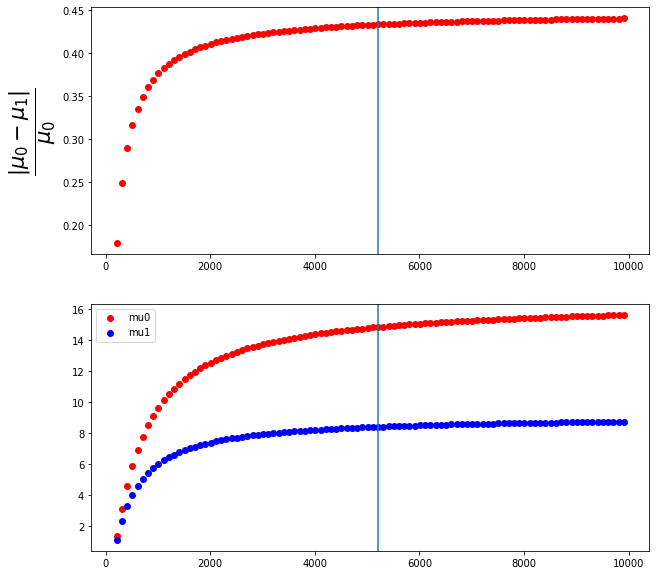

In [246]:
plt.figure(figsize=(10,10))

ax=plt.subplot(211)
ax.scatter(gammas,rel_dif_drifts,linewidth=4, color="red",marker='.')
ax.axvline(gamma)

ax.set_ylabel(r'$\frac{|\mu_0 - \mu_1|}{\mu_0}$',size=30)

ax=plt.subplot(212)
ax.scatter(gammas,dd[:,0],linewidth=4, color="red",marker='.',label="mu0")
ax.scatter(gammas,dd[:,1],linewidth=4, color="blue",marker='.',label="mu1")
ax.axvline(gamma)
ax.legend()



Text(0, 0.5, '$\\mu_t$')

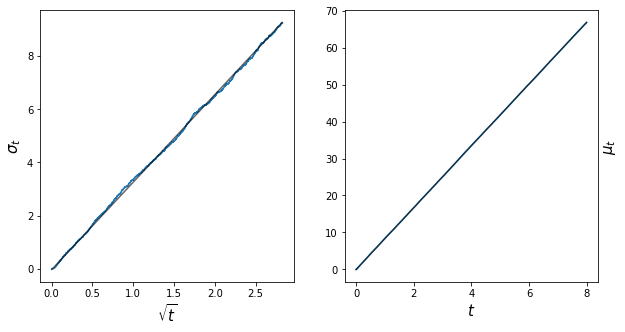

In [177]:
plt.figure(figsize=(10,5))
ax=plt.subplot(121)
SS=15
ax.plot(sqrtimind, l1_std)
ax.plot(sqrtimind[ini:fini], sigma*sqrtimind[ini:fini] + oosig, color="black", alpha=0.6)
ax.set_xlabel(r'$\sqrt{t}$',size=SS)
ax.set_ylabel(r'$\sigma_t$',size=SS)

ax=plt.subplot(122)
ax.plot(timind, np.abs(l1_mean))
ax.plot(timind[ini:fini], mu*timind[ini:fini] + oomu, color="black", alpha=0.6)
ax.yaxis.set_label_position("right")
ax.set_xlabel(r'$t$',size=SS)
ax.set_ylabel(r'$\mu_t$',size=SS)

In [ ]:
### If stopping time was not saved
total_time = 8.
dt = 1e-5
times = np.arange(0, 8 + dt, dt )
indis = np.logspace(0,np.log10(len(times)-1), int(1e4)).astype(int)
timind = [times[k] for k in indis]
indis_range = list(range(len(indis)))


Ntraj = int(1e3)
B = 8.
dB = .2
boundsB= np.arange(-B,B+dB,dB)

bpos = boundsB[boundsB>=0]
bneg = boundsB[boundsB<0]


deter, stop = {}, {}
stop["_0"] = {i:[] for i in range(1,Ntraj)}
stop["_1"] = {i:[] for i in range(1,Ntraj)}
deter["h0/h1"] ={indb:[0]*len(indis) for indb in range(len(boundsB))}
deter["h1/h0"] = {indb:[0]*len(indis) for indb in range(len(boundsB))}


n=1
ers = []
Ntraj = 1000
for itraj in tqdm(range(1,Ntraj)):
    [l1_1,l0_1], [l0_0,l1_0] = load_gamma(gamma, itraj=itraj,what="logliks.npy", flip_params=0).T, load_gamma(gamma, itraj=itraj,what="logliks.npy", flip_params=1).T
    log_lik_ratio, log_lik_ratio_swap = l1_1-l0_1, l1_0-l0_0

    for indb,b in enumerate(boundsB):
        deter["h0/h1"][indb] += ((log_lik_ratio[indis_range] < b).astype(int)  - deter["h0/h1"][indb])/n
        deter["h1/h0"][indb] += ((log_lik_ratio_swap[indis_range] < b).astype(int)  - deter["h1/h0"][indb])/n
        if b>=0:
            stop["_1"][itraj].append(get_stop_time(log_lik_ratio, b, timind))
            stop["_0"][itraj].append(get_stop_time(log_lik_ratio_swap, b,timind))
    n+=1

In [21]:
exp_path = get_exp_path(gamma)

In [22]:
path = get_path_config(total_time=8., dt=dt, itraj=itraj, exp_path=exp_path)

In [24]:
np.load(path+"states1.npy")

array([[-0.00390383,  0.05641406],
       [-0.00390383,  0.05641406],
       [-0.00390383,  0.05641406],
       ...,
       [ 0.17453922, -0.05539031],
       [-0.02121818,  0.09834733],
       [ 0.25888418, -0.08840244]])

In [25]:
path

'/data/uab-giq/scratch/matias/quantera/trajectories/mechanical_damp/[(1210.0, 0.0, 1.0, 1.0, 9), (100.0, 0.0, 1.0, 1.0, 9)]/99itraj/T_8.0_dt_1e-05/'

In [ ]:
st1 = []
det = []
for gamma in tqdm(gammas):

    exp_path = "sweep_gamma/{}".format(gamma)
    save_path = get_path_config(exp_path=exp_path,total_time=8., dt=1e-5, noitraj=True)
    stoch.append(np.load(save_path+"states0.npy"))
    det.append(np.load(save_path+"times_to_err_det.npy"))

In [33]:
stoch = []
det = []
for gamma in tqdm(gammas):

    exp_path = "sweep_gamma/{}".format(gamma)
    save_path = get_path_config(exp_path=exp_path,total_time=8., dt=1e-5, noitraj=True)
    stoch.append(np.load(save_path+"times_to_err_stoch.npy"))
    det.append(np.load(save_path+"times_to_err_det.npy"))

100%|██████████| 98/98 [00:03<00:00, 26.82it/s]


In [35]:
B = 8.
dB = .2
boundsB= np.arange(-B,B+dB,dB)

bpos = boundsB[boundsB>=0]
bneg = boundsB[boundsB<0]

stoch = np.stack(stoch)
det = np.stack(det)

ini = 20
fini = 38

100%|██████████| 98/98 [00:06<00:00, 14.51it/s]


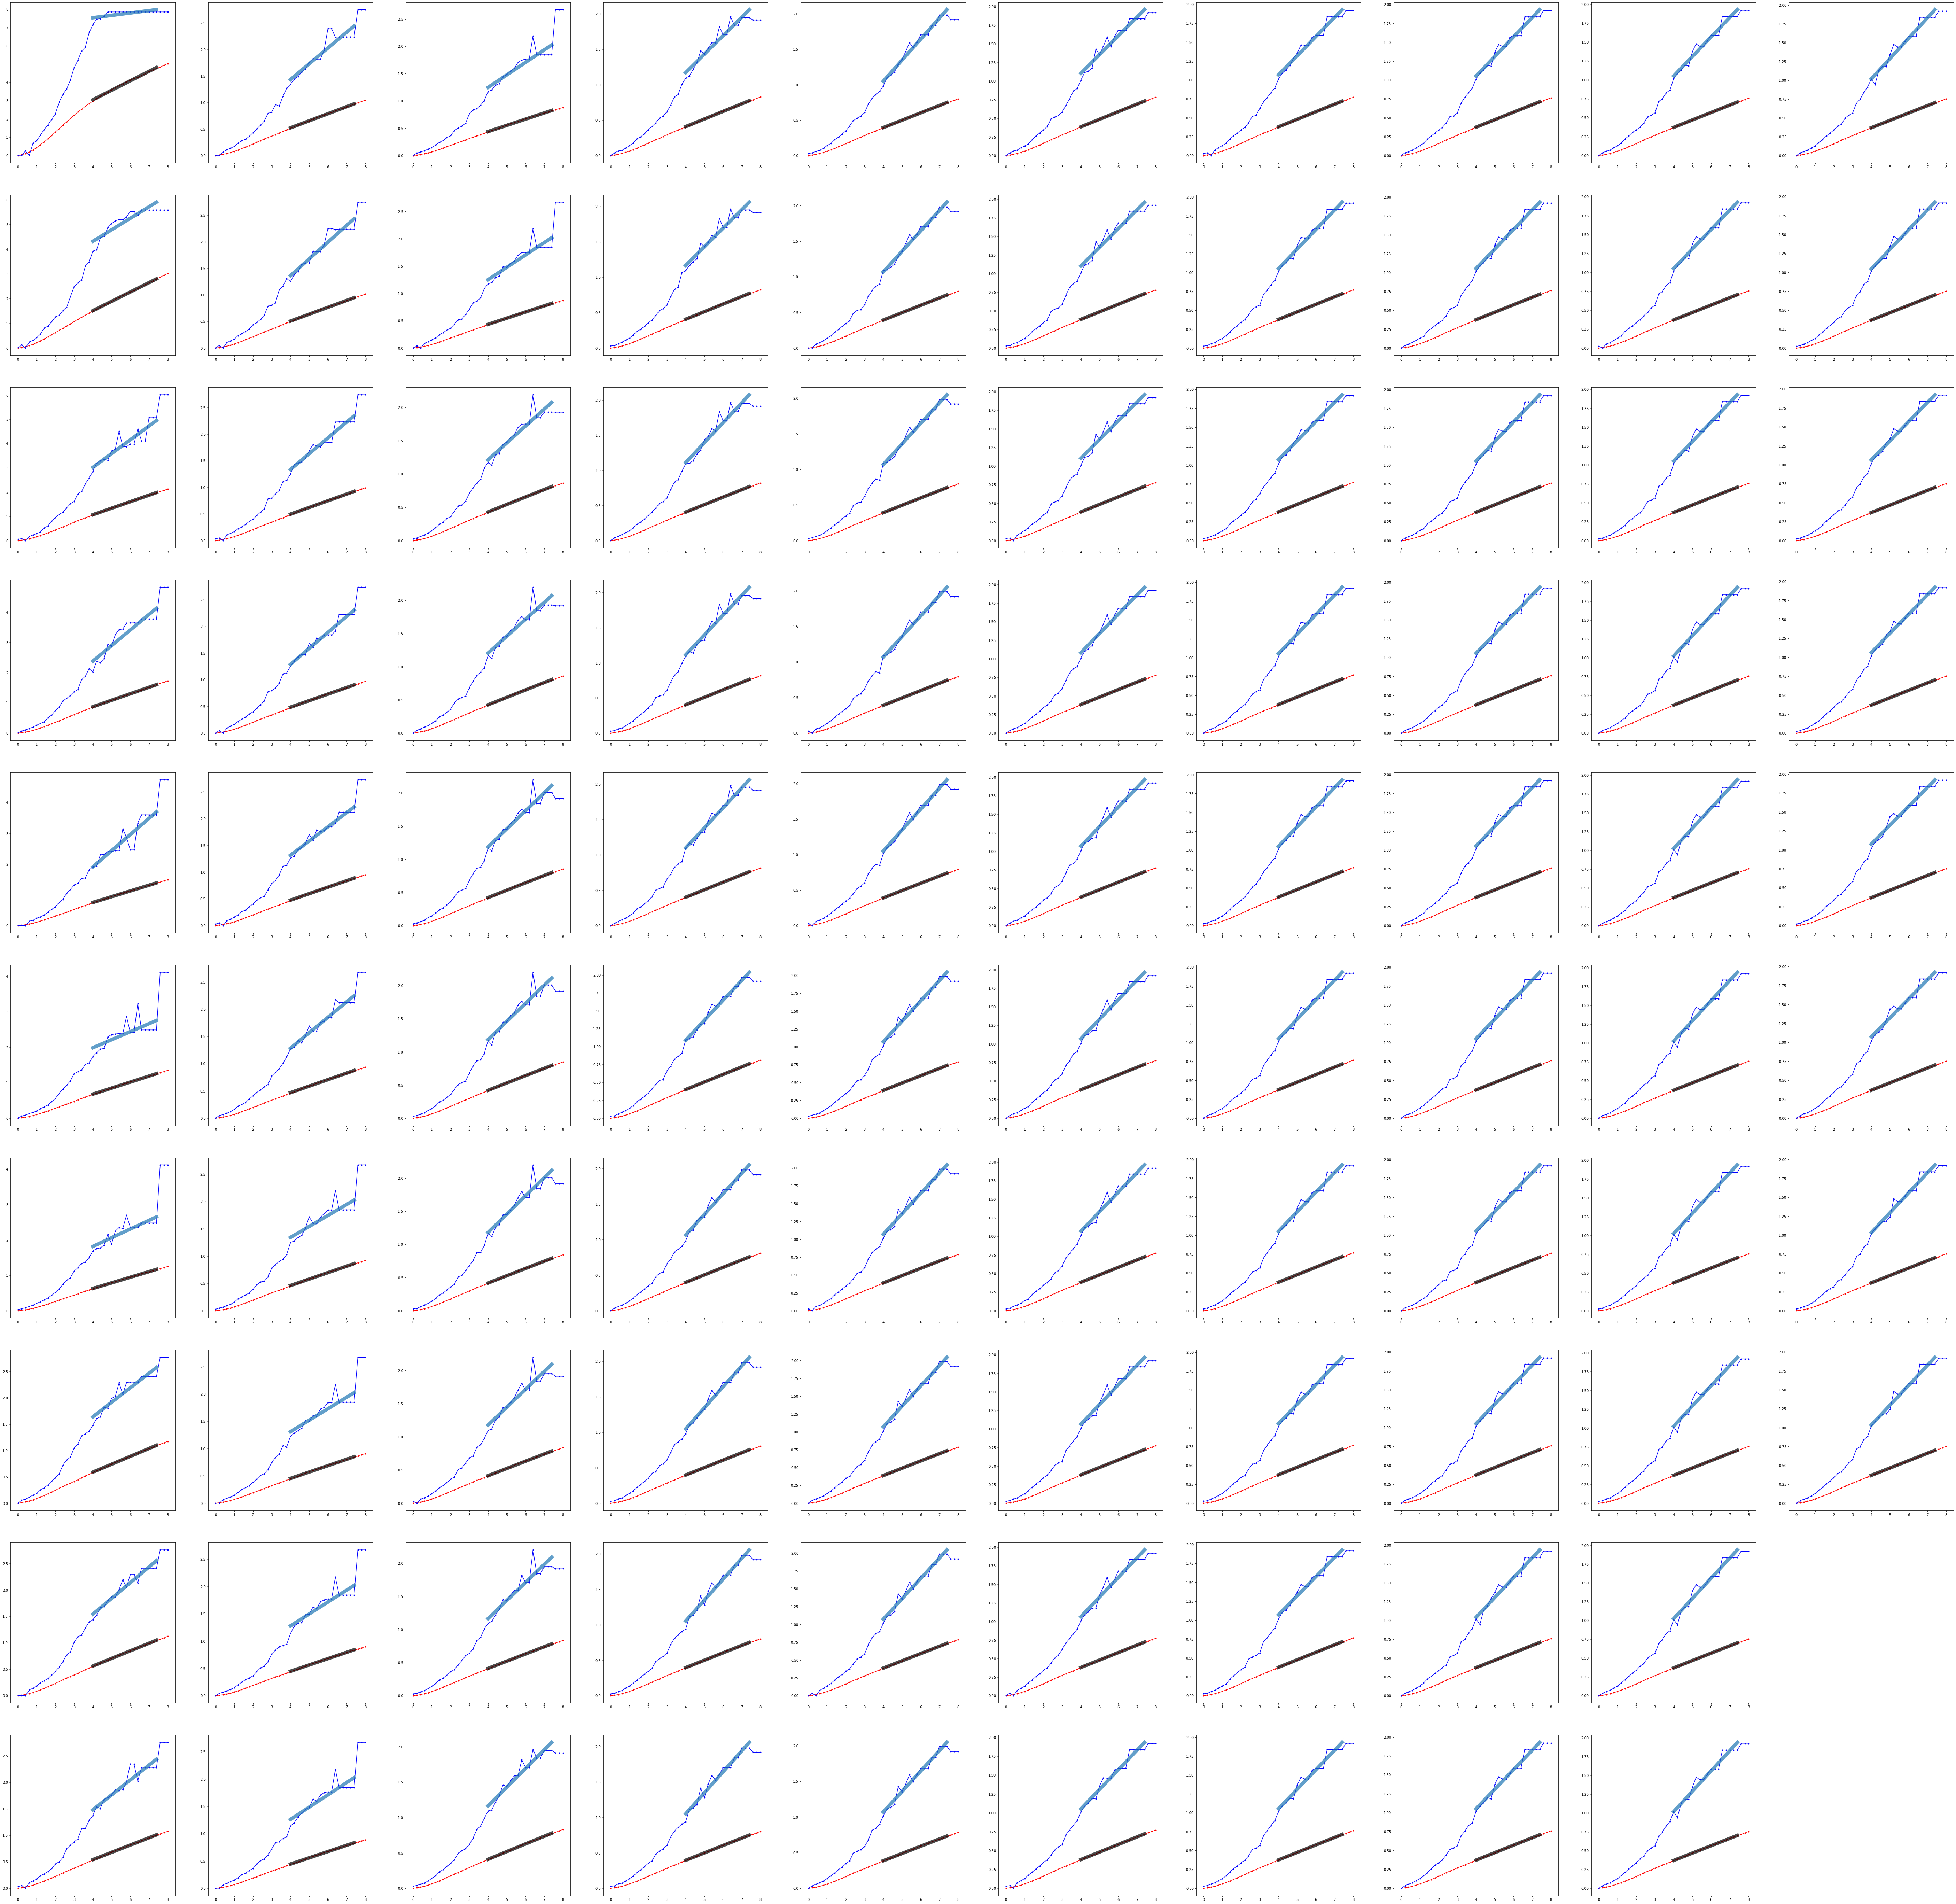

In [42]:
slopes_det, slopes_stoch = [], []
plt.figure(figsize=(100,100))
for i in tqdm(range(stoch.shape[0])):
    ax = plt.subplot2grid((10,10),(i%10, i//10))
    ax.plot(bpos,stoch[i,:],'.-',color="red")
    ax.plot(bpos,det[i,:],'.-', color="blue")
    slope_det, oo_det = np.polyfit(bpos[ini:fini], det[i,:][ini:fini], 1)
    ax.plot(bpos[ini:fini], slope_det*bpos[ini:fini] + oo_det,linewidth=10, alpha=0.7)
    slope_stoch, oo_stoch = np.polyfit(bpos[ini:fini], stoch[i,:][ini:fini], 1)
    ax.plot(bpos[ini:fini], slope_stoch*bpos[ini:fini] + oo_stoch,color="black",linewidth=10, alpha=0.7)
    slopes_stoch.append(slope_stoch)
    slopes_det.append(slope_det)
plt.savefig("big_plot_compa_tests.pdf")

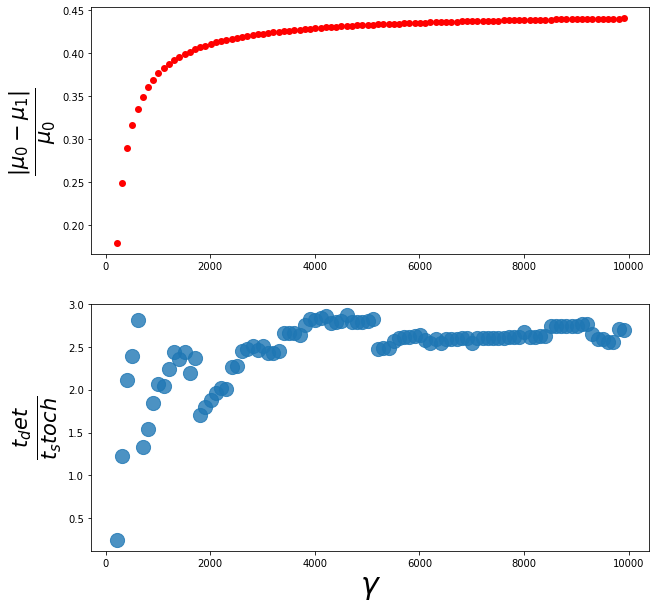

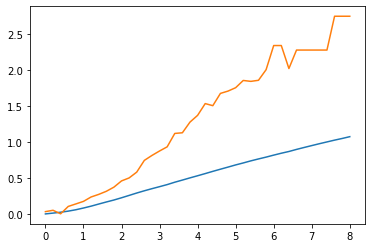

In [11]:
plt.plot(bpos,stoch[10,:])
plt.plot(bpos,det[10,:])

In [9]:
gamma = gammas[-1]

In [10]:
total_time = 8.
dt = 1e-5
times = np.arange(0, 8 + dt, dt )
indis = np.logspace(0,np.log10(len(times)-1), int(1e4)).astype(int)
timind = [times[k] for k in indis]
indis_range = list(range(len(indis)))


Ntraj = int(1e3)
B = 8.
dB = .2
boundsB= np.arange(-B,B+dB,dB)

bpos = boundsB[boundsB>=0]
bneg = boundsB[boundsB<0]


deter, stop = {}, {}
stop["_0"] = {i:[] for i in range(1,Ntraj)}
stop["_1"] = {i:[] for i in range(1,Ntraj)}
deter["h0/h1"] ={indb:[0]*len(indis) for indb in range(len(boundsB))}
deter["h1/h0"] = {indb:[0]*len(indis) for indb in range(len(boundsB))}



def load_gamma(gamma, itraj, what="logliks.npy", flip_params=0):
    h0 = gamma0, omega0, n0, eta0, kappa0 = 100., 0., 1., 1., 9
    h1 = gamma1, omega1, n1, eta1, kappa1 = gamma, 0., 1., 1., 9
    if flip_params != 0:
        params = [h0, h1]
    else:
        params = [h1,h0]
    exp_path = str(params)+"/"
    l =load_data(exp_path=exp_path, itraj=itraj, total_time=8., dt=1e-5, what=what)
    return l

In [11]:
ll = load_gamma(gamma, 1).T

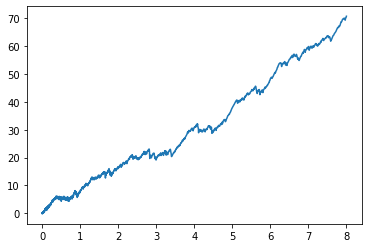

In [12]:
plt.plot(timind,ll[1]-ll[0])

In [13]:
from analysis.misc import *

In [14]:

n=1
ers = []
Ntraj = 1000
for itraj in tqdm(range(1,Ntraj)):
    [l1_1,l0_1], [l0_0,l1_0] = load_gamma(gamma, itraj=itraj,what="logliks.npy", flip_params=0).T, load_gamma(gamma, itraj=itraj,what="logliks.npy", flip_params=1).T
    log_lik_ratio, log_lik_ratio_swap = l1_1-l0_1, l1_0-l0_0

    for indb,b in enumerate(boundsB):
        deter["h0/h1"][indb] += ((log_lik_ratio[indis_range] < b).astype(int)  - deter["h0/h1"][indb])/n
        deter["h1/h0"][indb] += ((log_lik_ratio_swap[indis_range] < b).astype(int)  - deter["h1/h0"][indb])/n
        if b>=0:
            stop["_1"][itraj].append(get_stop_time(log_lik_ratio, b, timind))
            stop["_0"][itraj].append(get_stop_time(log_lik_ratio_swap, b,timind))
    n+=1




100%|██████████| 999/999 [05:08<00:00,  3.23it/s]


In [15]:
###########################
#### type I and II errors

alphas = list(deter["h1/h0"].values())
betas = list(deter["h0/h1"].values())

alphas = np.stack(alphas)
betas = np.stack(betas)




In [27]:
avg_err= lambda b: (1-np.exp(-abs(b)))/(np.exp(abs(b)) - np.exp(-abs(b)))

errs_bound = np.array([avg_err(b) for b in bpos])
tot_err = 0.5*(alphas+alphas)



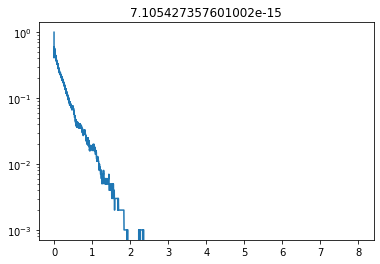

In [22]:
ax=plt.subplot(111)
ax.set_title(boundsB[40])
ax.plot(timind,tot_err[40,:])
ax.set_yscale("log")

In [28]:
symmetric = tot_err[40,:]
times_to_errs = np.array([timind[np.argmin(np.abs(symmetric - bound_err))] for bound_err in errs_bound])

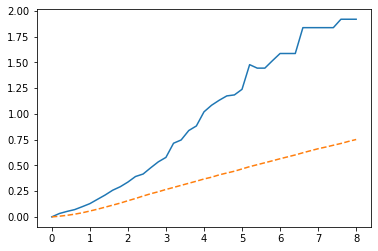

In [31]:
plt.plot(bpos,times_to_errs)
plt.plot(bpos,stoch[-1,:],'--')

In [46]:
indb=0

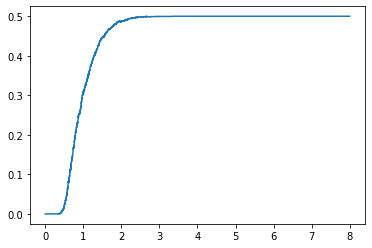

In [48]:
plt.plot(timind,.5*(alphas[indb,:] + betas[indb,:]))

In [24]:
lik_cum = np.load(save_path+"lik_cum.npy").T
mu_cum = np.load(save_path+"st_cum.npy").T

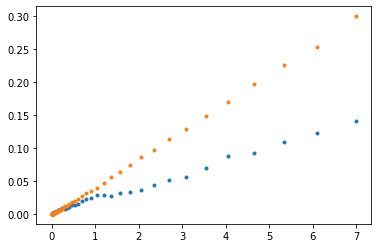

In [222]:
plt.plot(lik_cum[:,0], np.abs(lik_cum[:,1]),'.')
plt.plot(lik_cum[:,0], np.abs(lik_cum[:,2]),'.')

array([1.30656e+00, 3.34251e+00, 4.25754e+00, 4.79856e+00, 6.29774e+00,
       5.00510e+00, 1.00000e-05, 1.00000e-05, 1.00000e-05, 1.00000e-05,
       1.00000e-05, 1.00000e-05, 1.00000e-05, 1.00000e-05, 1.00000e-05,
       1.00000e-05, 1.00000e-05, 1.00000e-05, 1.00000e-05, 1.00000e-05,
       1.00000e-05, 1.00000e-05, 1.00000e-05, 1.00000e-05, 1.00000e-05,
       1.00000e-05, 1.00000e-05, 1.00000e-05, 1.00000e-05, 1.00000e-05,
       1.00000e-05, 1.00000e-05, 1.00000e-05, 1.00000e-05, 1.00000e-05,
       1.00000e-05, 1.00000e-05, 1.00000e-05, 1.00000e-05, 1.00000e-05,
       1.00000e-05])

array([2.00000000e-05, 1.04946167e+00, 3.01129222e+00, 4.17604488e+00,
       5.09610708e+00, 5.29931333e+00,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan])

In [199]:
np.load(save_path+"times_to_err_det.npy")

FileNotFoundError: [Errno 2] No such file or directory: '/data/uab-giq/scratch/matias/quantera/trajectories/mechanical_damp/sweep_gamma/110.0/T_8.0_dt_1e-05/times_to_err_det.npy'

In [56]:
gammas = np.arange(110, 10000, 100).astype("float64")

In [184]:
path = get_path_config(total_time=total_time, dt=dt, itraj=itraj, exp_path=exp_path)
os.makedirs(path, exist_ok=True)

NameError: name 'exp_path' is not defined

In [58]:
gamma = gammas[-1]

In [220]:
M=int(1e3)
ll1 = []
ll0 = []
ers=[]
for itraj in tqdm(range(1,M)):
    try:
        [l1_1,l0_1], [l0_0,l1_0] = load_gamma(gamma, itraj=itraj,what="logliks.npy", flip_params=0).T, load_gamma(gamma, itraj=itraj,what="logliks.npy", flip_params=1).T
        ll1.append(l1_1-l0_1)
        ll0.append(l1_0-l0_0)    
    except Exception:
        ers.append(itraj)
ll1 = np.stack(ll1)
ll0 = np.stack(ll0)

100%|██████████| 999/999 [00:35<00:00, 27.83it/s]


In [214]:
l1 = np.mean(ll1,axis=0)
l0 =np.mean(ll0,axis=0)

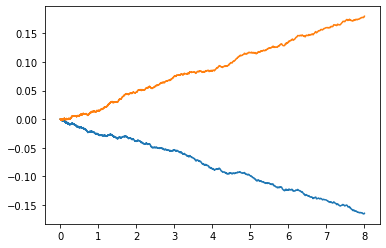

In [215]:
plt.plot(timind, l1)
plt.plot(timind, l0)

In [69]:
cumulants = {}
timind_cum = range(0, ll1.shape[1], 100)
for k in range(1,5):
    cumulants[k] = [kstat(ll1[:,t], k) for t in timind_cum]

In [70]:
cum_vals = np.stack(cumulants.values())

In [79]:
np.array(timind_cum)

array([   0,  100,  200,  300,  400,  500,  600,  700,  800,  900, 1000,
       1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100,
       2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200,
       3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300,
       4400, 4500, 4600, 4700, 4800, 4900, 5000, 5100, 5200, 5300, 5400,
       5500, 5600, 5700, 5800, 5900, 6000, 6100, 6200, 6300, 6400, 6500,
       6600, 6700, 6800, 6900, 7000, 7100, 7200, 7300, 7400, 7500, 7600,
       7700, 7800, 7900, 8000, 8100, 8200, 8300, 8400, 8500, 8600, 8700,
       8800, 8900, 9000, 9100, 9200, 9300, 9400, 9500, 9600, 9700, 9800,
       9900])

In [94]:
np.concatenate([np.array(timcum)[np.newaxis],cum_vals]

(5, 100)

(1, 100)

In [72]:
timcum = [timind[k] for k in timind_cum]

In [181]:
def get_diffS(gamma):
    dfs = []
    ers = []
    for itraj in tqdm(range(1,1000)):
        try:

            st11, st01 = load_gamma(gamma, itraj=itraj,what="states1.npy", flip_params=0).T, load_gamma(gamma, itraj=itraj,what="states0.npy", flip_params=0).T
            diff = st11 - st01
            diffSq = np.einsum('tj,tj->j',diff,diff)
            dfs.append(diffSq)
        except Exception:
            ers.append(itraj)
    dfs = np.stack(dfs)

    cums = {}
    timind_cum = range(0, dfs.shape[1], 100)
    for k in range(1,5):
        cums[k] = [kstat(dfs[:,t], k) for t in timind_cum]

    timcum = np.array([timind[k] for k in timind_cum])[np.newaxis]
    cum_vals = np.stack(cums.values())

    return np.concatenate([np.array(timcum),cum_vals])

In [182]:
cumum = get_diffS(110.)

100%|██████████| 999/999 [00:01<00:00, 835.05it/s]
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/IPython/core/interactiveshell.py:3343: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  exec(code_obj, self.user_global_ns, self.user_ns)


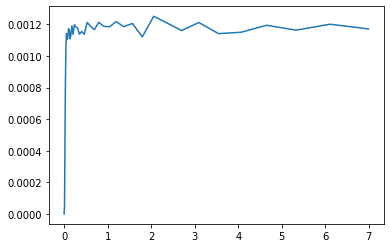

In [183]:
plt.plot(cumum[0],cumum[1] - cumum[2])

In [168]:
np.array(cumum[0][1]) - np.array(cumum[0][2])

array([2.56771005e-07, 2.56771005e-07, 2.56771005e-07, 2.56771005e-07,
       2.56771005e-07, 2.56771005e-07, 5.19993614e-07, 5.19993614e-07,
       5.19993614e-07, 7.99350071e-07, 7.99350071e-07, 1.09541225e-06,
       1.32302406e-06, 1.32302406e-06, 1.60092139e-06, 1.88703776e-06,
       2.14604038e-06, 2.63355612e-06, 2.89059838e-06, 3.49116966e-06,
       3.95562818e-06, 4.43189296e-06, 5.06856271e-06, 5.78820386e-06,
       6.74587705e-06, 7.38378789e-06, 8.65196741e-06, 9.83841546e-06,
       1.05202863e-05, 1.14072650e-05, 1.24901154e-05, 1.35200119e-05,
       1.44951488e-05, 1.58523751e-05, 1.75574025e-05, 1.84389750e-05,
       2.01642041e-05, 2.18783764e-05, 2.28412054e-05, 2.38717530e-05,
       2.50142286e-05, 2.51214542e-05, 2.55674363e-05, 2.57379047e-05,
       2.63788470e-05, 2.78163618e-05, 2.97899269e-05, 3.60897882e-05,
       4.31484440e-05, 5.66406066e-05, 8.15106764e-05, 1.20913016e-04,
       1.75939733e-04, 2.46678317e-04, 3.29140481e-04, 4.29460374e-04,
      

(array([405., 240., 152.,  84.,  55.,  31.,  11.,  14.,   4.,   3.]),
 array([6.46724935e-05, 2.80576952e-01, 5.61089232e-01, 8.41601512e-01,
        1.12211379e+00, 1.40262607e+00, 1.68313835e+00, 1.96365063e+00,
        2.24416291e+00, 2.52467519e+00, 2.80518747e+00]),
 <BarContainer object of 10 artists>)

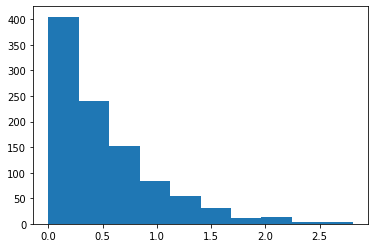

In [157]:
plt.hist(dfs[:,-1])

In [162]:
kstat(dfs[:,timind_cum[-1]], 1)

0.4716605962265899

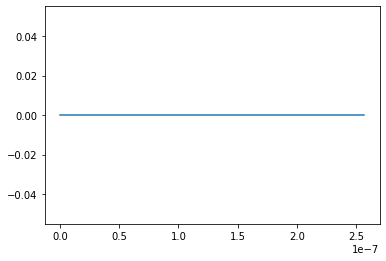

In [156]:
plt.plot(cumum[:,0], cumum[:,1] - cumum[:,2])


In [136]:
cumvals.shape

(5, 100)

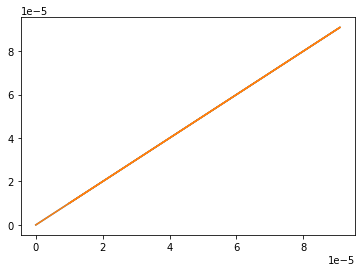

In [123]:
plt.plot(cumvals[:,0], cumvals[:,1])
plt.plot(cumvals[:,0], cumvals[:,4])

In [ ]:
[s11, s01], [s00,s10] = load_gamma(gamma, itraj=itraj,what="states1.npy", flip_params=0).T, load_gamma(gamma, itraj=itraj,what="states.npy", flip_params=1).T


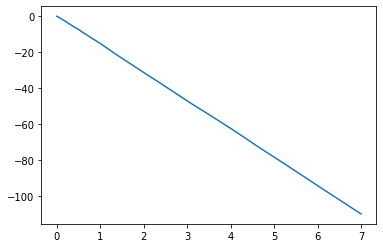

In [62]:
M=int(1e3)
ll1 = []
ll0 = []
ers=[]
for itraj in tqdm(range(1,M)):
    try:
        [l1_1,l0_1], [l0_0,l1_0] = load_gamma(gamma, itraj=itraj,what="logliks.npy", flip_params=0).T, load_gamma(gamma, itraj=itraj,what="logliks.npy", flip_params=1).T
        ll1.append(l1_1-l0_1)
        ll0.append(l1_0-l0_0)    
    except Exception:
        ers.append(itraj)
ll1 = np.stack(ll1)
ll0 = np.stack(ll0)

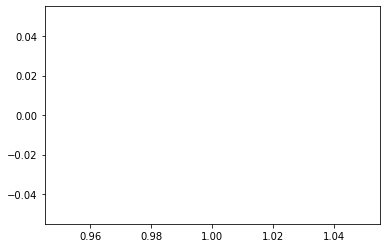

In [82]:
plt.plot([timind[k] for k in timind_cum], cumulants[1])

In [72]:
import matplotlib.pyplot as plt 

In [ ]:
n=1

for itraj in tqdm(range(1,M)):
    log_lik_ratio, log_lik_ratio_swap = load_liks(itraj=itraj, total_time=total_time, dt=dt)
    ll1.append(log_lik_ratio)
    ll0.append(log_lik_ratio_swap)    
ll1 = np.stack(ll1)
ll0 = np.stack(ll0)

In [29]:
load_gamma(210., itraj=900, what="logliks.npy")[

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [33]:
exp_path

'[(110.0, 0.0, 1.0, 1.0, 9), (100.0, 0.0, 1.0, 1.0, 9)]/'

In [35]:
path = get_path_config(total_time=total_time, dt=dt, itraj=1, exp_path=exp_path)
path

'/data/uab-giq/scratch/matias/quantera/trajectories/mechanical_damp/[(110.0, 0.0, 1.0, 1.0, 9), (100.0, 0.0, 1.0, 1.0, 9)]/1itraj/T_8.0_dt_0.01/'

array([[0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [1.75859327e-01, 1.74534677e-01],
       ...,
       [2.25916637e+02, 2.28892487e+02],
       [2.28314854e+02, 2.31372669e+02],
       [2.27835348e+02, 2.30730319e+02]])

In [45]:
data = np.random.randn(2,2000)

In [50]:
data[1]

array([-1.19856734, -1.10453418,  1.71442949, ..., -0.92517384,
       -0.54011586, -0.17580835])

In [51]:
pq.write_table(pa.table({str(k):data[k] for k in range(data.shape[0])}),"here")

In [65]:
pq.read_table("here").to_pandas().T.to_numpy()

array([[-0.16059986,  1.10941365,  0.25992009, ..., -0.02679132,
         1.19097498, -0.49885724],
       [-1.19856734, -1.10453418,  1.71442949, ..., -0.92517384,
        -0.54011586, -0.17580835]])

AttributeError: module 'pyarrow' has no attribute 'parquet'

In [2]:


import numpy as np
import matplotlib.pyplot as plt
from numerics.utilities.misc import *
import matplotlib
from scipy.linalg import solve_continuous_are
import pickle
from tqdm import tqdm
from analysis.misc import *
from scipy.special import erf

params, exp_path = def_params(flip = 0)

which = mode = give_model()
if "mechanical_damp" in which:
    total_time = 4.
    dt = 1e-5
elif which == "mechanical_freq":
    omega = .5*(params[1][1] + params[0][1])
    T_param = 150.
    ppg = 1e3
    period = 2*np.pi/omega
    total_time = T_param*period
    dt = period/ppg
elif (which == "optical_homodyne") or (which == "optical_heterodyne"):
    damping = params[1][0]
    total_time = 200.*damping
    dt = damping/1e3

timind, indis, indis_range = get_timind_indis(total_time, dt, rrange=True)



In [3]:
path_data = get_def_path()+"analysis/{}/".format(20000,mode)

In [4]:
log_lik_ratio, log_lik_ratio_swap = load_liks(itraj=1, total_time=total_time, dt=dt)
B = 8.
dB = .1
boundsB= np.arange(-B,B+dB,dB)
bpos = boundsB[boundsB>=0]

In [5]:
with open(path_data+"deter.pickle","rb") as f:
   deter = pickle.load(f)#, protocol=pickle.HIGHEST_PROTOCOL)

### load (just in case)
timbin1 = np.load(path_data+"timbin.npy")
timbin0 = np.load(path_data+"timbin.npy")#, timbin0)

l0 = np.load(path_data+"l0.npy")
l1 = np.load(path_data+"l1.npy")

cons0 = np.load(path_data+"cons0.npy")
cons1 = np.load(path_data+"cons1.npy")


stoch = np.load(path_data+"times_to_err_stoch.npy")
times_alpha_to_errB = np.load(path_data+"times_to_err_det.npy")

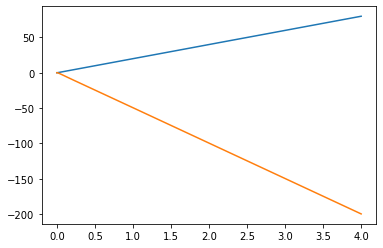

In [6]:
plt.plot(timind, l1)
plt.plot(timind, l0)

In [7]:
FIN = 1000
mu1, _ = np.polyfit(timind[:-FIN], l1[:-FIN],1)
mu0, _ = np.polyfit(timind[:-FIN], l0[:-FIN],1)

In [8]:
alpha_err = np.array([0.5*(1 - erf(0.5*np.sqrt(t*np.abs(mu0)))) for t in timind])
beta_err = np.array([0.5*(1 - erf(0.5*np.sqrt(t*abs(mu1)))) for t in timind])

alphas = np.stack([deter["h1/h0"][k] for k in range(len(boundsB))])
betas = np.stack([deter["h0/h1"][k] for k in range(len(boundsB))])

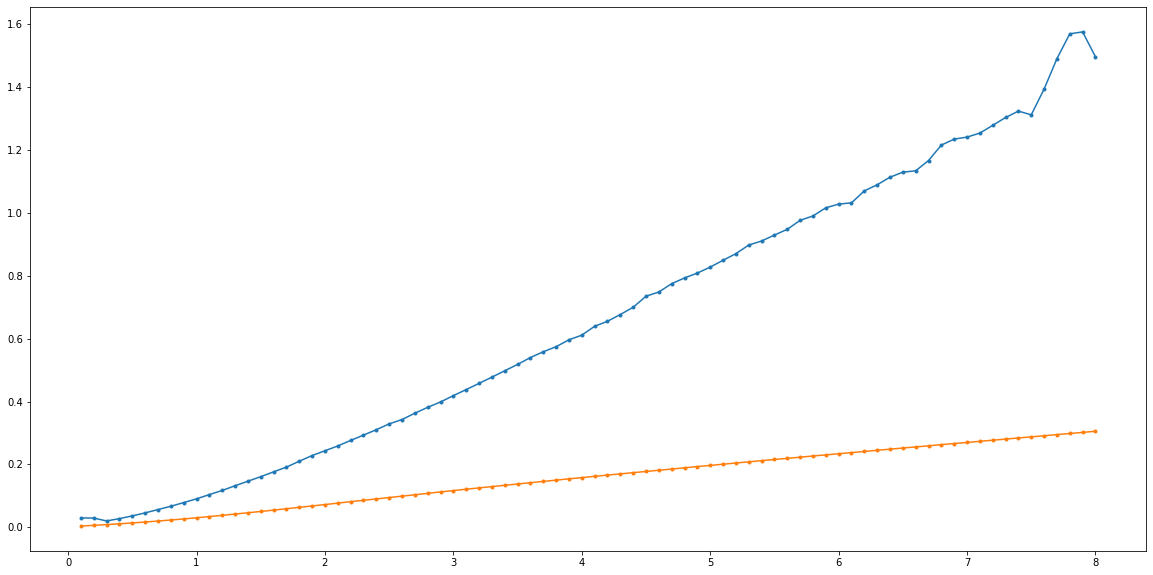

In [9]:
fig = plt.figure(figsize=(20,10))
ax = plt.subplot(111)
ax.plot(bpos, times_alpha_to_errB,'.-')
ax.plot(bpos, stoch,'.-')

In [10]:
inn =20
fin = -20

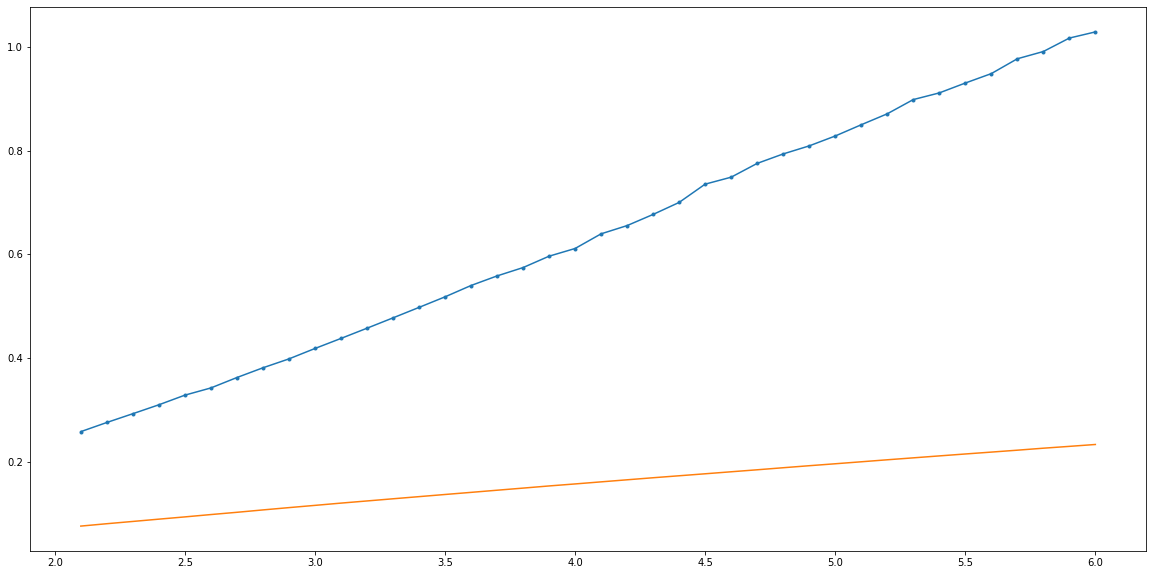

In [11]:
fig = plt.figure(figsize=(20,10))
ax = plt.subplot(111)
ax.plot(bpos[inn:fin], times_alpha_to_errB[inn:fin],'.-')
ax.plot(bpos[inn:fin], stoch[inn:fin])


In [12]:
sDet, odet = np.polyfit(bpos[inn:fin], times_alpha_to_errB[inn:fin],1)
sStoch, oStoch = np.polyfit(bpos[inn:fin], stoch[inn:fin],1)

In [13]:
sDet, sStoch, sDet/sStoch

(0.20191677298311517, 0.040156214547125244, 5.028282054478919)

In [14]:
mu1, mu0

(19.78662093376146, -49.377996312656165)

In [ ]:
n=1
M=int(2e4)
ll1 = []
ll0 = []
for itraj in tqdm(range(1,M)):
    log_lik_ratio, log_lik_ratio_swap = load_liks(itraj=itraj, total_time=total_time, dt=dt)
    ll1.append(log_lik_ratio)
    ll0.append(log_lik_ratio_swap)    
ll1 = np.stack(ll1)
ll0 = np.stack(ll0)

 96%|█████████▋| 19274/19999 [12:48<00:23, 30.80it/s]

In [23]:
os.makedirs("fig_gif", exist_ok=True)

In [38]:
def gaussian(x,mu, sig):
    return np.exp(-(x - mu)**2/(2*sig**2))/np.sqrt(2*np.pi*sig**2)

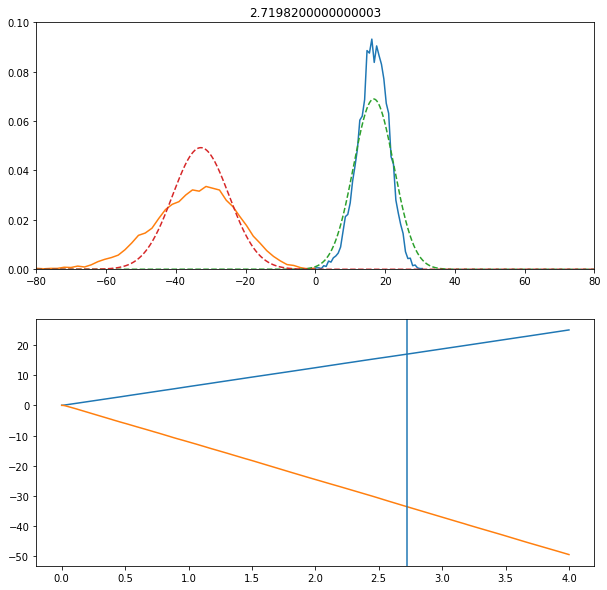

In [49]:
k=-300
c1, b1 = np.histogram(ll1[:,int(k)],bins=50, density=True)
c0, b0 = np.histogram(ll0[:,int(k)],bins=50, density=True)

L=80

plt.figure(figsize=(10,10))
ax=plt.subplot(211)
ax.set_title(timind[int(k)])
ax.plot(b1[:-1], c1)
ax.plot(b0[:-1], c0)
t = timind[int(k)]
eel = np.linspace(-L,L,int(1e4))
dist1 = [gaussian(l, mu1*t, np.sqrt(2*mu1*t)) for l in eel]
dist0 = [gaussian(l, mu0*t, np.sqrt(2*abs(mu0*t))) for l in eel]
ax.plot(eel, dist1,'--')
ax.plot(eel, dist0,'--')
ax.set_xlim([-L,L])
ax.set_ylim([0,.1])    
ax=plt.subplot(212)
ax.plot(timind, l1)
ax.plot(timind, l0)
ax.axvline(timind[int(k)])

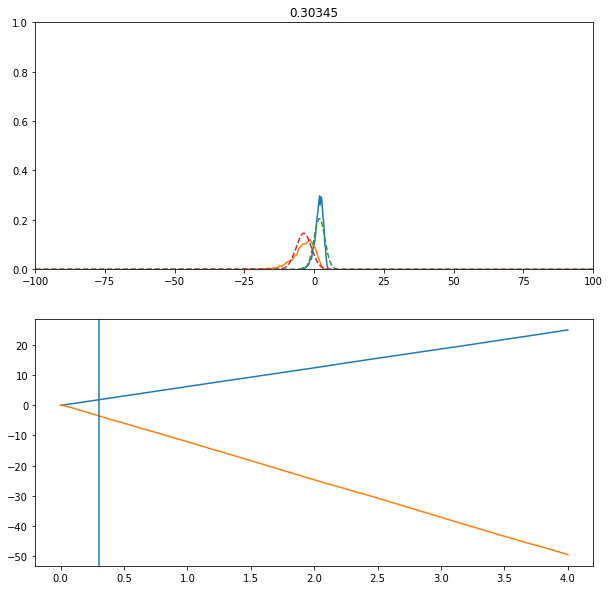

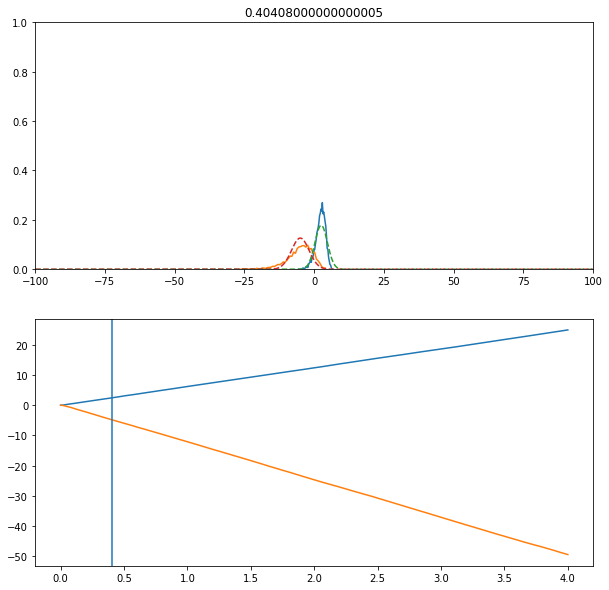

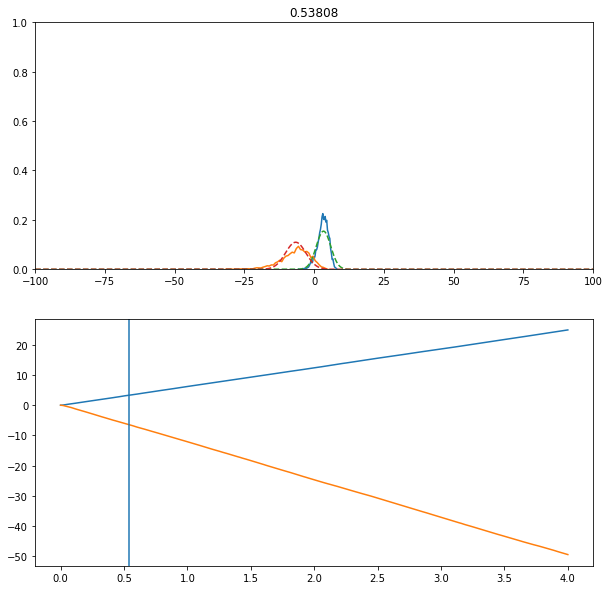

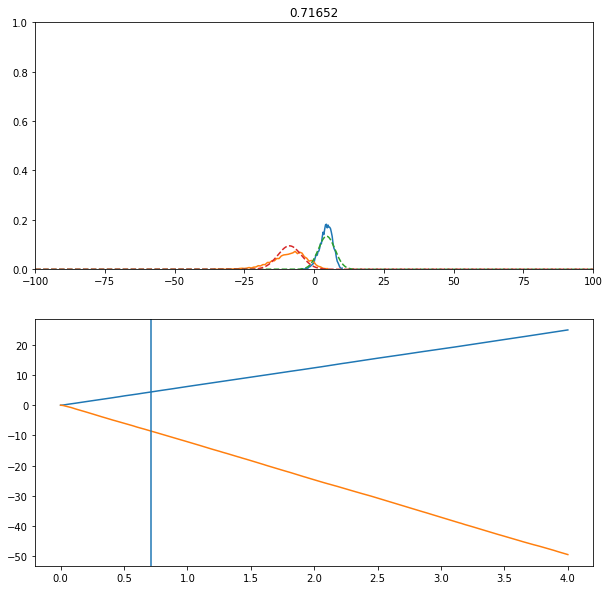

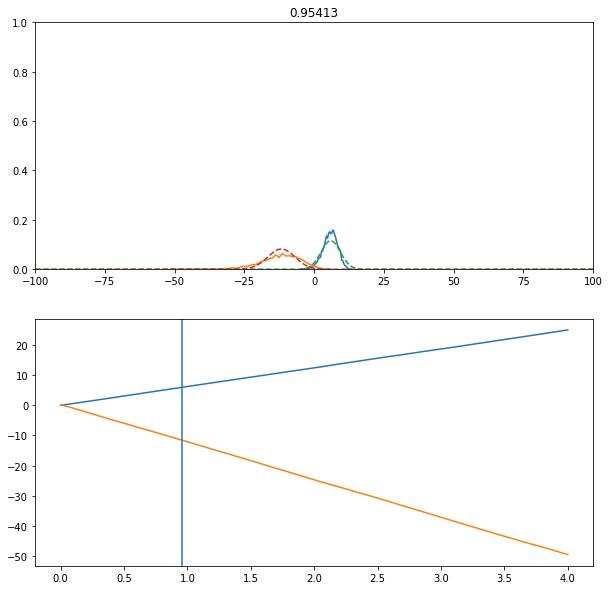

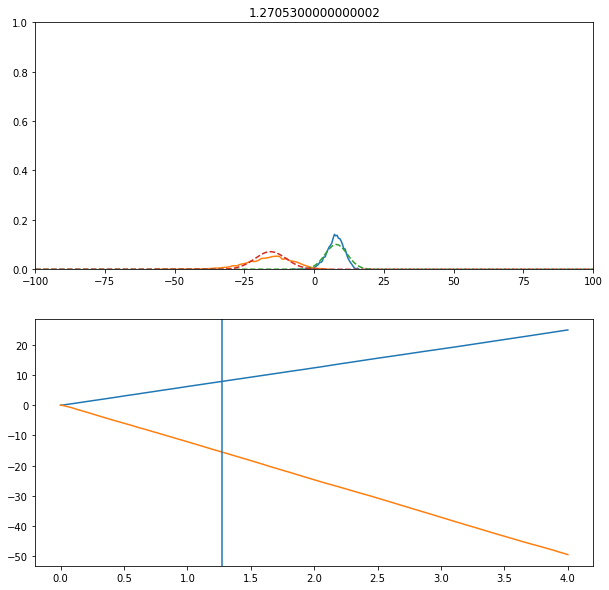

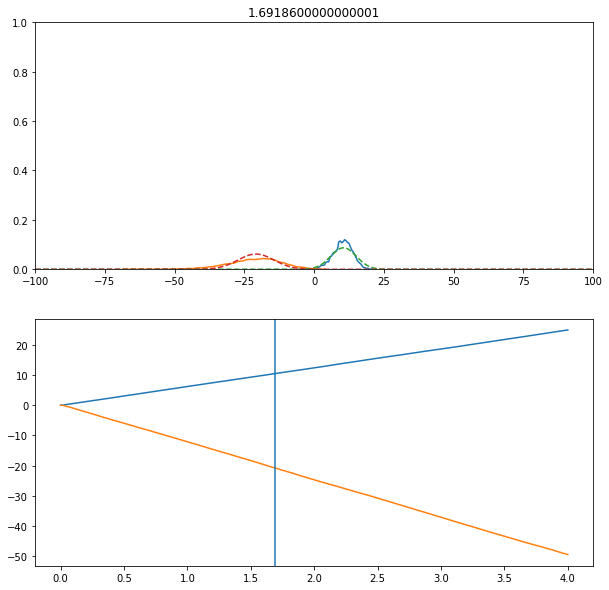

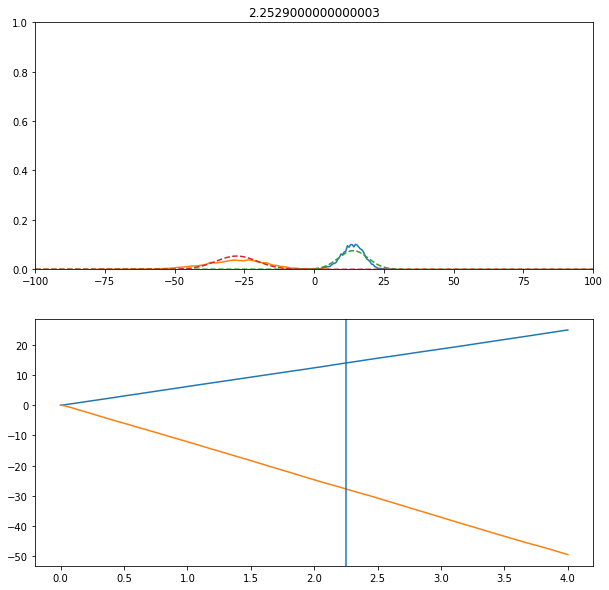

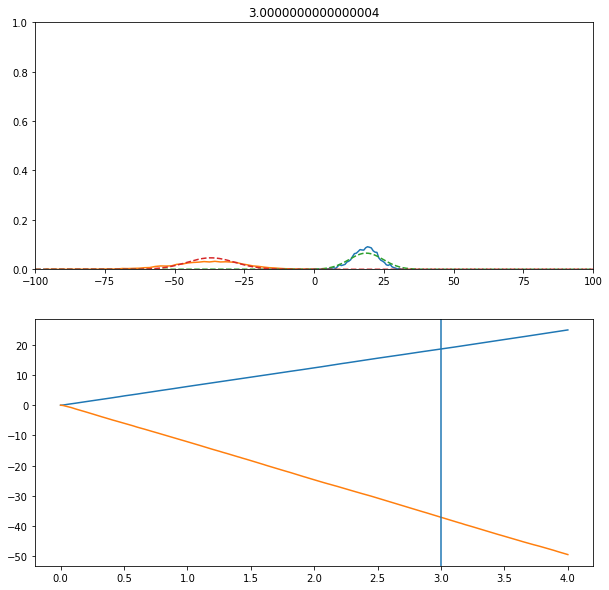

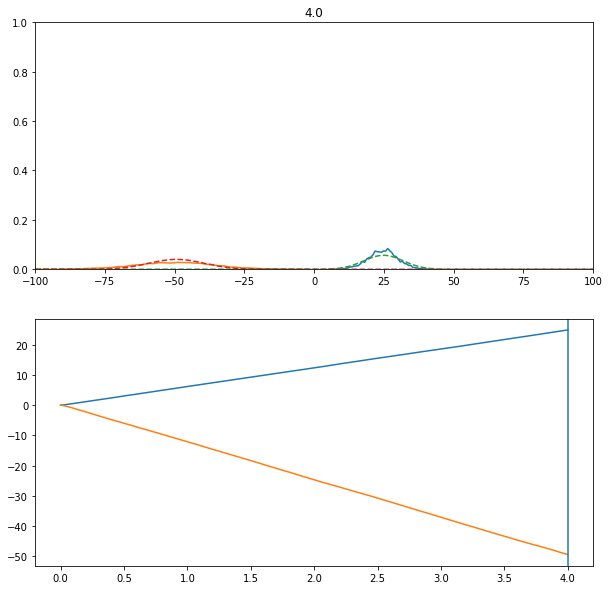

In [34]:
L=100
for ii,k in enumerate(np.linspace(8000,len(timind)-1,10)):

    c1, b1 = np.histogram(ll1[:,int(k)],bins=50, density=True)
    c0, b0 = np.histogram(ll0[:,int(k)],bins=50, density=True)

    plt.figure(figsize=(10,10))
    ax=plt.subplot(211)
    ax.set_title(timind[int(k)])
    ax.plot(b1[:-1], c1)
    ax.plot(b0[:-1], c0)
    t = timind[int(k)]
    eel = np.linspace(-L,L,int(1e4))
    dist1 = [gaussian(l, mu1*t, np.sqrt(2*mu1*t)) for l in eel]
    dist0 = [gaussian(l, mu0*t, np.sqrt(2*abs(mu0*t))) for l in eel]
    ax.plot(eel, dist1,'--')
    ax.plot(eel, dist0,'--')
    ax.set_xlim([-L,L])
    ax.set_ylim([0,1])    
    ax=plt.subplot(212)
    ax.plot(timind, l1)
    ax.plot(timind, l0)
    ax.axvline(timind[int(k)])
    
    plt.savefig("fig_gif/{}.png".format(ii))

# States

In [35]:
path = get_path_config(total_time = 4., dt= 1e-5, itraj=itraj, exp_path=exp_path)


In [36]:
states1 = load_data(exp_path=exp_path, itraj=1, total_time=4. , dt=dt, what="states1.npy")
states2 = load_data(exp_path=exp_path, itraj=1, total_time=4. , dt=dt, what="states1.npy")

In [ ]:
load_states(itraj, mode="damping",dtt=1e-5, to)

In [37]:
n=1
M=int(5*1e3)
ss1 = []
ss0 = []
for itraj in tqdm(range(1,M)):
    states1 = load_data(exp_path=exp_path, itraj=itraj, total_time=4. , dt=dt, what="states1.npy")
    states0 = load_data(exp_path=exp_path, itraj=itraj, total_time=4. , dt=dt, what="states0.npy")
    ss1.append(states1)
    ss0.append(states0)
    
ss1 = np.stack(ss1)
ss0 = np.stack(ss0)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 4999/4999 [00:06<00:00, 732.93it/s]


In [43]:
[gamma1, omega1, n1, eta1, kappa1],[gamma0, omega0, n0, eta0, kappa0],   = params

In [75]:
np.sqrt(kappa1*eta1)*dt

0.001

Text(0.5, 1.0, 'h1 true')

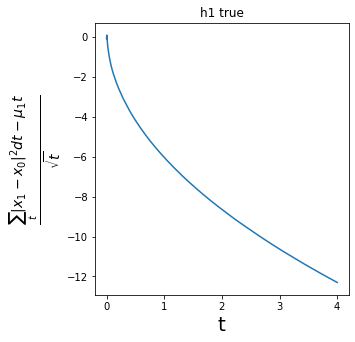

In [136]:
plt.figure(figsize=(10,5))
ax = plt.subplot(121)
ax.plot(timind,(np.cumsum(0.5*4*kappa1*eta1*np.sum((np.abs(ss1[200] - ss0[200]))**2,axis=1))*dt - mu1*np.array(timind))/np.sqrt(timind))
ax.set_ylabel(r'$\frac{\sum_t |x_1 - x_0|^2 dt  -\mu_1 t}{\sqrt{t}}$',size=20)
ax.set_xlabel("t",size=20)
ax.set_title("h1 true")

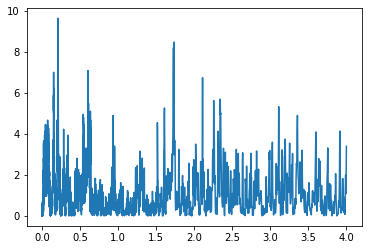

In [137]:
plt.plot(timind,0.5*4*kappa1*eta1*np.sum((np.abs(ss1[20] - ss0[20]))**2,axis=1)/mu1)

In [138]:
diff = ss1 - ss0
C = np.sqrt(4*eta1*kappa1)

In [140]:
dsq = np.einsum('std, std -> st',np.dot(C,diff),np.dot(C,diff))
dst = 0.5*np.mean(dsq,axis=0)

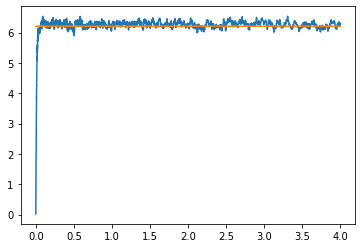

In [142]:
plt.plot(timind,dst)
plt.plot(timind, mu1*np.ones(len(timind)))
